# **Declaração do Problema** | **Problem Statement**


---

#### **Contexto do Negócio**

O Instagram não é apenas uma plataforma para compartilhar momentos e interagir com outras pessoas, mas também uma plataforma onde influenciadores digitais, lojas entre outros divulgam seus produtos e cursos.

Sabe-se que para fins de crescimento de um perfil no Instagram, principalmente àqueles com fins comerciais, é preciso focar na publicação de Reels, já que Reels são o modo mais fácil de alcançar e otimizar o ganho de novos seguidores. Enquanto isso, stories e publicação no feed geralmente alcançam apenas seguidores.

Um influenciador digital no Instagram tem tido baixo desempenho em ganhar mais seguidores e com isso promover seus produtos e cursos com maior chance de conversão de leads. Ele quer entender como ele pode obter idéias de conteúdos a criar baseado em competidores do mesmo nicho.

Sabendo que o Instagram é uma plataforma muito dinâmica, onde a criação de conteúdo acontece o tempo todo e há uma competição acirrada, entender quais tópicos estão em alta porém com ainda potencial de crescimento é chave para o crescimento da página.

---

#### **Objetivos**
Com o intuito de otimizar o ganho de novos seguidores, alguns pontos-chave merecem atenção especial:
1. Quais tópicos quebram padrões de estagnação no ganho de seguidores?
2. Quais tópicos aceleram o crescimento de ganho de seguidores no Instagram?
3. Quais tópicos permitem crescimento prolongado ao longo do tempo?
4. Quais tópicos favorecem o crescimento, mas com competitividade baixa?

Como cientista de dados responsável por este projeto, minha função é analisar os dados obtidos do Instagram e gerar insights acionáveis sobre qual é o melhor caminho para o cliente obter seguidores no momento: quais tópicos estão em alta mas com potencial para crescimento de seguidores e como melhor otimizar o tempo de criação de conteúdo.

---

#### **Dicionário dos dados**
O conjunto de dados inclui informações de desempenho no Instagram de vários concorrentes, incluindo dados gerais do perfil e métricas técnicas dos Reels. Os principais atributos são:  

1. **Informações gerais do perfil no Instagram**  
   - **day (dia):** dia da semana.
   - **date (data):** data.
   - **followers_gained (seguidores ganho):** Número de seguidores ganhos em determinada data  .
   - **total_followers (total de seguidores):** Número total de seguidores em determinada data.
   - **Influencer:** Identificação do influenciador digital  
  

2. **Informações das métricas de Reels do Instagram**  
   - **media (imagens):** Link das imagens utilizadas.  
   - **Postlink (Link da postagem):** Link para o Reel.  
   - **Content (Conteúdo):** Conteúdo do Reel.
   - **Date (data):** Data da postagem.
   - **Type (Tipo):** Tipo de postagem.
   - **Likes (Curtidas):** Quantidade de curtidas recebidas no Reel.
   - **Comments (Comentários):** Comentários recebidos no Reel.
   - **Interactions (Interações):** Interações recebidas no Reel.
   - **Influencer:** Identificação do influenciador digital.


#### **Business Context**  
Instagram is not only a platform for sharing moments and interacting with other people, but also a space where digital influencers, stores, and others promote their products and courses.

It is known that for growing an Instagram profile—especially those with commercial purposes—it is necessary to focus on publishing Reels, since Reels are the easiest way to reach new audiences and optimize follower growth. Meanwhile, Stories and feed posts generally reach only existing followers.

A digital influencer on Instagram has been experiencing low performance in gaining new followers and, as a result, struggles to promote products and courses with higher lead conversion potential. They want to understand how they can get ideas for content creation based on competitors in the same niche.

Given that Instagram is a highly dynamic platform — where content creation happens constantly and competition is intense — understanding which topics are trending but still have growth potential is key for growing the page.

---

#### **Objective**
With the goal of optimizing the gain of new followers, several key points deserve special attention::

1. Which topics break stagnation patterns in follower growth?
2. Which topics accelerate follower growth on Instagram?
3. Which topics allow for sustained growth over time?
4. Which topics favor growth but with low competition?

As the data scientist responsible for this project, my role is to analyze Instagram data and generate actionable insights on the best path for the client to gain followers at this moment: which topics are trending but still have growth potential, and how to best optimize content creation time.

---

#### **Data Dictionary**
The dataset includes Instagram performance data from several competitors, including general profile informations and technical metrics for Reels. Key attributes are:  

1. **General Instagram Profile Information**  
   - **day (dia):** day of the week.
   - **date (data):** date.
   - **followers_gained (seguidores ganho):** Number of followers gained on a given date.
   - **total_followers (total de seguidores):** Total number of followers on a given date.
   - **Influencer:** Identification of the digital influencer  
  

2. **Instagram Reels Metrics Information**  
   - **media (imagens):** Link to the images used.  
   - **Postlink (Link da postagem):** Link to the Reel.  
   - **Content (Conteúdo):** Reel content.
   - **Date (data):** Posting date.
   - **Type (Tipo):** Type of post.
   - **Likes (Curtidas):** Number of likes received on the Reel.
   - **Comments (Comentários):** Number of comments received on the Reel.
   - **Interactions (Interações):** Number of interactions received on the Reel.
   - **Influencer:** Identification of the digital influencer.

## **Importando as bibliotecas necessárias** | **Importing necessary libraries**

In [93]:
# Bibliotecas para ler, manipular dados e configurar avisos
# Libraries to read, manipulate data and configure warnings
import pandas as pd
import numpy as np
import os
from datetime import timedelta
import warnings
import logging
from typing import Union, Dict, List, Optional
import matplotlib.dates as mdates

# Bibliotecas para visualização de dados
# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para clusterização e análise dos clusters
# Libraries for clustering and their analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Biblioteca para manipulação de dado em formato de texto
# Library to manipulate text data
from sklearn.feature_extraction.text import TfidfVectorizer

# Biblioteca para padroniação de dados
# Library for data standardization
from sklearn.preprocessing import StandardScaler




In [94]:
from google.colab import drive  # Connecting Google Colab with Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### 🔍 Primeiros passos | First steps
Estruturando dados e análise exploratória.
Structuring data and exploratory analysis.

In [95]:
# Carregando a primeira tabela CSV como uma dataframe da biblioteca pandas
# Loading the first csv table as a pandas dataframe
data = pd.read_excel("/content/drive/MyDrive/python_notebooks/tables_influencers/socialblade_table2.xlsx")

In [96]:
# Criando lista com caminho para cada dado de Influencer no Instagram
# Creating a list with the path to each Instagram Influencer data
file_paths = [
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/rafaela_klein.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/carol_faria.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/cintia_de_andrade.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/paula_moreno.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/heidi_feitoza.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/suzane_oliveira.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/hirlene_costa.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/gabriela_martinez.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/cris_parolin.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/djneiffer_santini.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/ju_tenorio.csv",
    "/content/drive/MyDrive/python_notebooks/instagram_competidores_1/marcello_andrade.csv"
]

# Criando lista para guardar os arquivos como dataframes
# Creating a list to store archives as dataframes
dataframe_list = []

for file_path in file_paths:
    # Extraindo o nome do influencer do nome do arquivo
    # Extracting influencer name from filename
    influencer_name = os.path.splitext(os.path.basename(file_path))[0]

    # Carregar os csvs como dataframe e criar coluna com nome do Influencer
    # Load the CSV and create influencer column
    df = pd.read_csv(file_path)
    df["Influencer"] = influencer_name

    # Adicionando coluna com nome do influencer ao resto dos dados
    # Appending the column with Influencer's name to the rest of the data
    dataframe_list.append(df)

# Concatenar todas as dataframes em uma única dataframe
# Concatenate all dataframes into a single dataframe
data2 = pd.concat(dataframe_list, ignore_index=True)

# Verificar quantidade de Reels postados por Influencer
# Verify how many Reels posted by Influencer
print(f"Total rows in concatenated dataframe: {len(data2)}")
print(f"Influencer counts:\n{data2['Influencer'].value_counts()}")
print(f"\nDataframe shape: {data2.shape}")
print(f"Columns: {data2.columns.tolist()}")

Total rows in concatenated dataframe: 290
Influencer counts:
Influencer
djneiffer_santini    62
carol_faria          59
cris_parolin         49
paula_moreno         32
suzane_oliveira      30
rafaela_klein        14
ju_tenorio           12
marcello_andrade     11
heidi_feitoza         7
gabriela_martinez     6
cintia_de_andrade     5
hirlene_costa         3
Name: count, dtype: int64

Dataframe shape: (290, 10)
Columns: ['Media', 'PostLink', 'Content', 'Date', 'Type', 'Likes', 'Comments', 'Interactions', 'Engagement', 'Influencer']


In [97]:
# Checando por valores nulos em cada coluna de ambas dataframes
# Checking for missing values in each column of both dataframes
print(data.isna().sum())
print(data2.isna().sum())

Day                 0
Date                0
Followers_gained    0
Total_followers     0
Influencer          0
dtype: int64
Media             0
PostLink          0
Content           2
Date              0
Type              0
Likes             0
Comments          0
Interactions      0
Engagement      245
Influencer        0
dtype: int64


In [98]:
# Substituindo valores nulos por zero
# Replacing NAs with zero
data2 = data2.fillna(0)

In [99]:
# Checando a estrutura de ambas dataframes
# Checking the structure of both dataframes
print(data.isna().info())
print(data2.isna().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Day               394 non-null    bool 
 1   Date              394 non-null    bool 
 2   Followers_gained  394 non-null    bool 
 3   Total_followers   394 non-null    bool 
 4   Influencer        394 non-null    bool 
dtypes: bool(5)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Media         290 non-null    bool 
 1   PostLink      290 non-null    bool 
 2   Content       290 non-null    bool 
 3   Date          290 non-null    bool 
 4   Type          290 non-null    bool 
 5   Likes         290 non-null    bool 
 6   Comments      290 non-null    bool 
 7   Interactions  290 non-null    bool 
 8   Engagement    290 n

In [100]:
# Checando por linhas duplicadas em cada coluna
# Checking for duplicated rows in each column
print (data.duplicated().sum())
print (data2.duplicated().sum())

0
0


📝 **Observações:** A dataframe 'data' possui 5 colunas e 394 linhas, contendo dados como: dia de postagem, data, seguidores ganhos, total de seguidores e quem é o influenciador. Já a dataframe data2 possui 10 colunas e 290 linhas fornecendo informações de cada reel postado, como data, número de likes, comentários, interações, além do link de acesso ao reel e quem é o influenciador. Data2 possuia 247 valores nulos, estes foram substituidos por zero. Não há valores duplicados.

Além disso, vemos que dos 290 reels, Djneiffer Santini foi a que mais postou, 62 no total. Enquanto isso, Hirlene Costa postou apenas 3 reels.

📝 **Observations:** The 'data' dataframe has 5 columns and 394 rows, having data such as: post day, date, follwers gained, total follower and who is the influencer. Meanwhile, data2 dataframe has 10 columns and 290 rows provinding informations about each reel posted, like date, number of likes, comments and interactions, besides the reel's access link and who is the influencer. Data2 has 247 null values, these were replaced by zero.There are no duplicated values.

Moreover, we see that from the 290 reels, Djneiffer Santini was the one who posted the most, a total of 62. Meanwhile, Hirlene Costa posted only 3 reels.

In [101]:
data.head()

,Day,Date,Followers_gained,Total_followers,Influencer
0,Fri,2025-12-19,+579,386835,marcello_andrade
1,Sat,2025-12-20,+510,387345,marcello_andrade
2,Sun,2025-12-21,+703,388048,marcello_andrade
3,Mon,2025-12-22,+687,388735,marcello_andrade
4,Tue,2025-12-23,+637,389372,marcello_andrade


In [102]:
data2.head()

,Media,PostLink,Content,Date,Type,Likes,Comments,Interactions,Engagement,Influencer
0,https://scontent-lhr6-1.cdninstagram.com/o1/v/...,https://www.instagram.com/reel/DT5lx6IkdGX/,Pra quem acha que é fácil entregar conteúdo to...,2026-01-24 13:19,Reel,0,27,27,0.0,rafaela_klein
1,https://scontent-lhr6-1.cdninstagram.com/o1/v/...,https://www.instagram.com/reel/DT0X3Bhkbas/,✨ Por que emagrecer depois da menopausa fica m...,2026-01-22 12:40,Reel,0,11,11,0.0,rafaela_klein
2,https://scontent-lhr6-1.cdninstagram.com/o1/v/...,https://www.instagram.com/reel/DTv51h1iN_S/,✨A esteatose hepática costuma ser descoberta “...,2026-01-20 19:02,Reel,0,6,6,0.0,rafaela_klein
3,https://scontent-lhr8-1.cdninstagram.com/o1/v/...,https://www.instagram.com/reel/DTi-yhbCBnt/,🧬 Você não está “condenado” pela genética.\n\n...,2026-01-15 18:36,Reel,0,16,16,0.0,rafaela_klein
4,https://scontent-lhr6-1.cdninstagram.com/o1/v/...,https://www.instagram.com/reel/DTgV8rGCIxY/,Existe motivo maior que esse para tomar bastan...,2026-01-14 17:59,Reel,0,11,11,0.0,rafaela_klein


📝**Informação:** Aqui percebemos que a coluna Followers_gained/seguidores ganhos possui simbolos matemáticos para atribuir informação de ganho e perda de seguidores. Contudo, isso impede cálculos. Dessa forma, essa coluna será transformada em duas: uma contendo o número de seguidores ganhos e outra contendo os seguidores perdidos

📝**Information:** Here we notice that the column Followers_gained has mathematical symbols to assign gain and loss of followers information. However, this inhibits calculations. Therefore, this column will be broken into two: one having the number of followers gained and the other having followers lost.

## **Criação de funções** | **Creating functions**

⚠️**Funções para limpeza de dados, criação de novas variáveis, relatório e visualização dos resultados:**

*   Remoção de + e - e criação de colunas separadas para seguidores ganhos e perdidos, e também de saldo total de seguidores. Havendo também padronização das colunas de data no formato data e hora

*   Para cada reel de cada influenciador separadamente, criou-se uma janela de 3 e 7 dias entre o dia da postagem e dias posteriores a data da postagem do reel

*   Criação de métricas de: saldo de seguidores total, seguidores ganhos, seguidores perdidos, média de seguidores ganhos, pico de seguidores ganhos e consistência no ganho de seguidores para a janela de 3 e 7 dias

*   Criação de métricas de engajamento. A primeira é dada pela razão entre número de comentários e likes (comentários/likes), onde quanto menor o valor há indicação de consumo de conteúdo passivo, ou seja, ganho de seguidores mas poucos comentários. A segunda é chamada de pontuação de engajamento que multiplica curtidas e comentários por pesos distintos e depois soma-se os valores, quanto maior o valor mais engajamento


*   Métrica de Eficiência de crescimento no curto (3 dias) e longo (7 dias) prazo. As métricas são: sustentação do crescimento, retenção de crescimento em porcentagem e eficiência de crescimento. A primeira é dada pela fórmula (crescimento no longo prazo - crescimento no curto prazo). A segunda é dada por (crescimento no longo prazo/crescimento no curto prazo*100), o valor 0 significa que só houve crescimento no curto prazo, o valor 50 indica que houve crescimento a longo prazo de 50% comparado ao de curto prazo, etc. A terceira, caso o crescimento no curto prazo for diferente de zero, ela é dada pela divisão do crescimento a longo prazo pelo de curto prazo, valores acima de 1 indicam crescimento superior a longo prazo. Dessa forma, essa métricas estão relacionadas ao crescimento no futuro (após postagem do reel)


*   Também foram criadas categorias de performance. Nelas foram usados valores normalizados de curtidas,comentários e dos valores do total de ganho de seguidores no curto prazo (3 dias). Cada reel recebeu uma pontuação de viralização, e com esses valores, critérios foram criados para categorização em 4 tipos distintos: viral e com engajamento,
viral mas silencioso, crescimento contínuo, negativo ou sem crescimento

*   Foi identificados reels com crescimento rápido e engajamento rapido

*   As métricas foram calculadas para ambas janelas temporais (3 e 7 dias). Isso permitiu saber o quanto cada reel gerou de crescimento a partir de sua data de postagem

*   Por fim, foram criadas funções para visualização dos resultados, geração de relatório e exportação em csv, e também sua versão simplificada (engloba todas as métricas criadas numa só função)

⚠️**Functions for data cleaning, feature engineering, report and visualization of the results:**

*   Removal of + and - and creation of separate columns for followers gained and followers lost, as well as the total follower balance. Also includes standardization of date columns into datetime format

*   For each reel of each influencer separately, a 3-day and 7-day window was created between the posting date and the days following the reel’s posting date

*   Creation of metrics: total follower balance, followers gained, followers lost, average followers gained, peak followers gained, and consistency in follower gain for the 3- and 7-day window

*   Creation of engagement metrics. The first one is given by the ratio between number of comments and likes (comments/likes), where lower values indicate passive content consumption, meaning follower gain but few comments. The second is called engagement score, it multiplies likes and comments by distinct weights and then sum the values, the higher the value the more engagement


*   Growth Efficiency metrics in short (3 days) and long (7 days) term. The metrics are: sustained growth, porcentage of growth retention and growth efficiency. The first one is given by the formula (long-term growth - short-term growth). The second is given by (long-term growth / short-term growth *100), the value 0 indicates there was only short-term growth, the value 50 means there were 50% of long-term growth compared to short-term, etc. The third, in case short-term growth is different than zero, is given by the division of long-term growth by short-term growth, values above 1 indicate higher long-term growth. This way, these metrics are related to future growth (after reel posting)


*   Also, performance categories were created. Likes, comments and short-term growth normalized values were used for them. Each reel received a virality score, and with those values, criteria was created for the creation of 4 distint categories: viral with engagement, viral and silent, steady growth and negative/no growth

*   Reels with growth and engagement spikes were identified


*   The metrics were calcualted for both time windows (3 and 7 days). In turn, it allowed knowing how much growth each reel generated starting from its posting date   

*   In the end, functions for the visualization of the results, report generation and exporting as csv, and also the simplified version (includes all metrics created in one single function)


In [103]:
# Configurar registros
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Não mostrar avisos
# Suppress warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. FUNÇÕES PARA LIMPEZA DOS DADOS
# 1. DATA CLEANING FUNCTIONS
# ============================================================================

def clean_follower_data(value: Union[str, float, int, None]) -> float:
    """
    Convert string like '+175', '-118', or '-1.332' to proper numeric values.
    """
    if pd.isna(value):
        return 0.0

    if isinstance(value, str):
        # Remover sinal de +, vírgula e espaço
        # Remove plus signs, commas and spaces
        cleaned_value = value.replace('+', '').replace(',', '').strip()

        # Configurar separador decimal
        # Set up thousand separator
        if cleaned_value.count('.') > 1:
            parts = cleaned_value.split('.')
            if len(parts[-1]) <= 2:
                cleaned_value = ''.join(parts[:-1]) + '.' + parts[-1]
            else:
                cleaned_value = cleaned_value.replace('.', '')

        try:
            return float(cleaned_value)
        except ValueError:
            logger.warning(f"Could not convert '{value}' to float. Returning 0.")
            return 0.0

    elif isinstance(value, (int, float)):
        return float(value)

    else:
        logger.warning(f"Unexpected type {type(value)}. Returning 0.")
        return 0.0


def prepare_follower_data(df: pd.DataFrame, follower_col: str = 'Followers_gained') -> pd.DataFrame:
    """
    Prepare follower data with proper handling of gains and losses.
    """
    df = df.copy()

    # Aplicar a função clean_follower_data nos dados contendo informações de seguidores
    # Apply the clean_folloer_data function on the data containing follower information
    df['Followers_gained_clean'] = df[follower_col].apply(clean_follower_data)

    # Separando ganhos e perdas de seguidores
    # Separating follower gains and losses
    df['Followers_gained_positive'] = np.where(df['Followers_gained_clean'] > 0,
                                               df['Followers_gained_clean'], 0)
    df['Followers_lost'] = np.where(df['Followers_gained_clean'] < 0,
                                     abs(df['Followers_gained_clean']), 0)
    df['Net_followers_gained'] = df['Followers_gained_clean']

    return df


def convert_date_columns(df: pd.DataFrame, date_col: str = 'Date') -> pd.DataFrame:
    """
    Convert date columns to datetime and sort.
    """
    # Convertendo a coluna de data para formato de data
    # Converting date column to datetime
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(['Influencer', date_col]).reset_index(drop=True)
    return df


# ============================================================================
# 2. FUNÇÕES PARA CALCULO DE MÉTRICAS
# 2. METRIC CALCULATION FUNCTIONS
# ============================================================================

def calculate_window_metrics(window_df: pd.DataFrame) -> Dict[str, float]:
    """
    Calculate metrics for a given time window.
    """

    # Criando condição para que a função retorne imediatamente caso não haja valores válidos
    # Creating condition for the function to give a return immediately if there are no valid values
    if window_df.empty:
        return {
            'total_gain': np.nan,
            'gains': np.nan,
            'losses': np.nan,
            'peak_gain': np.nan,
            'avg_daily_gain': np.nan,
            'growth_consistency': np.nan,
            'window_size': len(window_df)
        }
      # Havendo valores válidos fazer:
      # In case of valid values, do:
    try:
        # Soma do total ganho de seguidores excluindo-se as perdas
        # Followers gained sum excluding the losses
        total_gain = window_df['Net_followers_gained'].sum()

        # Soma do ganho de seguidores
        # Followers gained sum
        gains = window_df['Followers_gained_positive'].sum()

        # Soma da perda de seguidores
        # Followers losses sum
        losses = window_df['Followers_lost'].sum()

        # Ganho máximo de seguidores
        # Peak gain of followers
        peak_gain = window_df['Net_followers_gained'].max()

        # Ganho médio diário de seguidores
        # Daily average gain of followers
        avg_daily_gain = total_gain / len(window_df) if len(window_df) > 0 else np.nan

        # Obtendo os dias nos quais os ganhos foram maiores que as perdas
        # Obtaining the days when the gains were greater than the losses
        positive_days = (window_df['Net_followers_gained'] > 0).sum()

        # Porcentagem de dias da janela nos quais houve ganho positivo de crescimento de seguidores
        # Percentage of days in the window where there was positive net follower growth
        growth_consistency = (positive_days / len(window_df)) * 100 if len(window_df) > 0 else np.nan

        # Retornar as seguintes informações:
        # Return the following information:
        return {
            'total_gain': total_gain,
            'gains': gains,
            'losses': losses,
            'peak_gain': peak_gain,
            'avg_daily_gain': avg_daily_gain,
            'growth_consistency': growth_consistency,
            'window_size': len(window_df)
        }

      # Retornar mensagem de erro se não puder calcular as métricas
      # Return error message if couldn't calculate the metrics
    except Exception as e:
        logger.error(f"Error calculating window metrics: {e}")
        return {
            'total_gain': np.nan,
            'gains': np.nan,
            'losses': np.nan,
            'peak_gain': np.nan,
            'avg_daily_gain': np.nan,
            'growth_consistency': np.nan,
            'window_size': len(window_df)
        }


def calculate_engagement_metrics(reel_row: pd.Series) -> Dict[str, float]:
    """
    Calculate Instagram-appropriate engagement metrics.
    """
    # Extraindo dados de likes e comentários, se houver NA substituir por zero
    # Extracting likes and comments data, if there is NA replace with zero
    likes = reel_row['Likes'] if pd.notna(reel_row['Likes']) else 0
    comments = reel_row['Comments'] if pd.notna(reel_row['Comments']) else 0

    # Razão entre comentários e likes
    # Comments-to-Likes Ratio
    comments_to_likes_ratio = comments / likes if likes > 0 else 0

    # Pontuação de engajamento (Com peso distinto para likes e comentários)
    # Engagement Score (weighted distinctively for likes and comments)
    engagement_score = (likes * 0.7 + comments * 0.3) if (likes + comments) > 0 else 0

    # Retornar as seguintes informações:
    # Return the following:
    return {
        'likes': likes,
        'comments': comments,
        'comments_to_likes_ratio': comments_to_likes_ratio,
        'engagement_score': engagement_score
    }


def calculate_growth_metrics(short_metrics: Dict, long_metrics: Dict) -> Dict[str, float]:
    """
    Calculate Instagram-appropriate growth metrics.
    """
    # Caso houver valores nulos retornar zero, se não houver retornar ganho total
    # In case of null values return zero, else return total gain
    short_gain = 0 if pd.isna(short_metrics['total_gain']) else short_metrics['total_gain']
    long_gain = 0 if pd.isna(long_metrics['total_gain']) else long_metrics['total_gain']

    # Crescimento sustentado - Quando long_gain é maior há mais crescimento sustentado ao long do tempo
    # Sustained Growth - When long gain is greater there is more sustained growth across time
    sustained_growth = long_gain - short_gain

    # Porcentagem da retenção de crescimento
    # Growth Retention Percentage

    # Se o ganho no curto prazo é maior que zero calcular porcentagem de retenção de crescimento
    # If short gain is greater than zero calculate growth retention porcentage
    if short_gain > 0:
        growth_retention_pct = (long_gain / short_gain) * 100

    # Se o ganho no curto prazo é igual a zero e no longo prazo é maior que zero retorne valor infinito
    # If short gain is equal zero and long gain is greater than zero return infinite value
    elif short_gain == 0 and long_gain > 0:
        growth_retention_pct = np.inf

    # Se ambos ganhos são igual a zero retornar 100 (não houve crescimento) e se no curto prazo for maior que zero e no longo igual a zero retorne zero (sem retenção)
    # If both gains are equal to zero turn 100 (no growth) and if short gain is greater than zero and long gain equals zero return zero (no retention)
    elif short_gain == 0 and long_gain == 0:
        growth_retention_pct = 100
    else:
        growth_retention_pct = 0

    # Se ganho no curto prazo é diferente de zero, calcule efficiência de crescimento, caso contrário retorne ganho no longo prazo
    # If short gain is different than ero, calculate growth efficiency, else return long gain
    if short_gain != 0:
        growth_efficiency = long_gain / short_gain
    else:
        growth_efficiency = long_gain

    # Retorne eficiência de crescimento, crescimento sustentado e porcentagem de retenção de crescimento
    # Return growth efficiency, sustained growth and growth retention porcentage
    return {
        'sustained_growth': sustained_growth,
        'growth_retention_pct': growth_retention_pct,
        'growth_efficiency': growth_efficiency
    }


def calculate_performance_categories(df: pd.DataFrame) -> pd.DataFrame:
    """
    Categorize reels based on performance.
    """
    df = df.copy()

    # Cria pontuação de viralização (combinando engajamento e crescimento)
    # Create virality Score (combining engagement and growth)

    # Normalização dos valores de curtidas entre 0 e 1
    # Normalization of likes values between 0 and 1
    if df['Likes'].max() > 0:
        likes_norm = df['Likes'] / df['Likes'].max()
    else:
        likes_norm = 0

    # Normalização dos valores de comentários entre 0 e 1
    # Normalization of comment values between 0 and 1
    if df['Comments'].max() > 0:
        comments_norm = df['Comments'] / df['Comments'].max()
    else:
        comments_norm = 0

    # Normalização entre 0 e 1 dos valores de ganho total nos 3 dias pós-postagem
    # Normalization between 0 and 1 of total gains in the 3 days after posting
    if df['3day_total_gain'].max() > 0:
        gain_norm = df['3day_total_gain'] / df['3day_total_gain'].max()
    else:
        gain_norm = 0

    # Pontuação de viralização considerando valores normalizados de curtida, comentários e ganhos nos 3 primeiros dias
    # Virality score considering the normalized likes, comments and 3-day gains values
    df['virality_score'] = (likes_norm * 0.3 + comments_norm * 0.3 + gain_norm * 0.4) * 100

    # Criando condições para categorias de performance
    # Creating conditions for performance categories
    conditions = [
        (df['3day_total_gain'] > 100) & (df['comments_to_likes_ratio'] > 0.05),
        (df['3day_total_gain'] > 100) & (df['comments_to_likes_ratio'] <= 0.05),
        (df['3day_total_gain'] > 0) & (df['3day_total_gain'] <= 100),
        (df['3day_total_gain'] <= 0)
    ]

    # Associando as condições criadas com os nomes das categorias e adicionando a dataframe
    # Associating the conditions created with category names and adding to the dataframe
    choices = ['Viral & Engaging', 'Viral but Quiet', 'Steady Growth', 'Negative/No Growth']
    df['performance_category'] = np.select(conditions, choices, default='Other')

    # Obtendo valores superiores à 75% dos valores de ganho total em 3 dias e likes
    # Obtaining values which are greater than 75% of values of 3-days total gain and likes
    q3_growth = df['3day_total_gain'].quantile(0.75) if len(df) > 0 else 0
    q3_likes = df['Likes'].quantile(0.75) if len(df) > 0 else 0

    # Identificação de crescimento rápido e engajamento rápido
    # Growth and engagement Spike Detection
    df['growth_spike'] = df['3day_total_gain'] > q3_growth
    df['engagement_spike'] = df['Likes'] > q3_likes

    return df


# ============================================================================
# 3. FUNÇÃO DE PROCESSAMENTO PRINCIPAL
# 3. MAIN PROCESSING FUNCTION
# ============================================================================

def process_reel_analytics(followers_df: pd.DataFrame, reels_df: pd.DataFrame,
                          window_days_short: int = 3, window_days_long: int = 7) -> pd.DataFrame:
    """
    Main function to process reel analytics with Instagram-appropriate metrics.
    """
    logger.info(f"Starting Instagram reel analytics for {len(reels_df)} reels")

    # Preparando os dados
    # Preparing the data
    followers_df = prepare_follower_data(followers_df)
    followers_df = convert_date_columns(followers_df)
    reels_df = convert_date_columns(reels_df)

    # Agrupando dados de seguidores por influencer para checagem mais rápida
    # Group follower data by influencer for faster lookup
    influencer_groups = {influencer: group for influencer, group in followers_df.groupby('Influencer')}

    results = []
    processed_count = 0

    # Processe cada reel
    # Process each reel
    for idx, reel in reels_df.iterrows():
        reel_date = reel['Date']
        influencer = reel['Influencer']

        # Obter dados de cada influenciador específico
        # Get influencer-specific data
        influencer_data = influencer_groups.get(influencer, pd.DataFrame())

        # Se não for possível obter dado de algum influenciador retornar messagem
        # If cannot obtain data from an influencer, return the mesage
        if influencer_data.empty:
            logger.warning(f"No follower data found for influencer: {influencer}")

        # Definindo janelas de datas - Começa no dia da postagem e termina 2 dias depois
        # Defining date windows - Starts on the posting date and ends 2 days later
        start_date_short = reel_date
        end_date_short = reel_date + timedelta(days=window_days_short - 1)

        # Definindo janelas de datas - Começa no dia da postagem e termina 6 dias depois
        # Defining date windows - Starts on the posting date and ends 6 days later
        start_date_long = reel_date
        end_date_long = reel_date + timedelta(days=window_days_long - 1)

        # Definindo datas pertencentes ao período curto e ao período longo
        # Defining dates belonging to short period and long period
        short_window = influencer_data[
            (influencer_data['Date'] >= start_date_short) &
            (influencer_data['Date'] <= end_date_short)
        ] if not influencer_data.empty else pd.DataFrame()

        long_window = influencer_data[
            (influencer_data['Date'] >= start_date_long) &
            (influencer_data['Date'] <= end_date_long)
        ] if not influencer_data.empty else pd.DataFrame()

        # Aplicando função calculate_window_metrics em dados da janela temporal curta e longa
        # Applying calculate_window_metrics function on the short and long time window
        short_metrics = calculate_window_metrics(short_window)
        long_metrics = calculate_window_metrics(long_window)

        # Calculo de métricas de engajamento
        # Calculate engagement metrics
        engagement_metrics = calculate_engagement_metrics(reel)

        # Calculo de métricas de crescimento
        # Calculate growth metrics
        growth_metrics = calculate_growth_metrics(short_metrics, long_metrics)

        # Informações para retornar
        # Information to return
        result_row = {
            # Basic information
            'Media': reel['Media'],
            'PostLink': reel['PostLink'],
            'Content': reel['Content'],
            'Reel_Date': reel_date,
            'Type': reel['Type'],
            'Influencer': influencer,
            'Likes': engagement_metrics['likes'],
            'Comments': engagement_metrics['comments'],
            'Interactions': reel['Interactions'] if 'Interactions' in reel and pd.notna(reel['Interactions']) else 0,
            'comments_to_likes_ratio': engagement_metrics['comments_to_likes_ratio'],
            'engagement_score': engagement_metrics['engagement_score'],

            # Métricas na janela de curto prazo
            # Short window metrics
            f'{window_days_short}day_total_gain': short_metrics['total_gain'],
            f'{window_days_short}day_gains': short_metrics['gains'],
            f'{window_days_short}day_losses': short_metrics['losses'],
            f'{window_days_short}day_peak_gain': short_metrics['peak_gain'],
            f'{window_days_short}day_avg_daily_gain': short_metrics['avg_daily_gain'],
            f'{window_days_short}day_growth_consistency': short_metrics['growth_consistency'],
            f'{window_days_short}day_window_size': short_metrics['window_size'],

            # Métricas na janela de longo prazo
            # Long window metrics
            f'{window_days_long}day_total_gain': long_metrics['total_gain'],
            f'{window_days_long}day_gains': long_metrics['gains'],
            f'{window_days_long}day_losses': long_metrics['losses'],
            f'{window_days_long}day_peak_gain': long_metrics['peak_gain'],
            f'{window_days_long}day_avg_daily_gain': long_metrics['avg_daily_gain'],
            f'{window_days_long}day_growth_consistency': long_metrics['growth_consistency'],
            f'{window_days_long}day_window_size': long_metrics['window_size'],

            # Outras métricas
            # Other metrics
            'sustained_growth': growth_metrics['sustained_growth'],
            'growth_retention_pct': growth_metrics['growth_retention_pct'],
            'growth_efficiency': growth_metrics['growth_efficiency'],

            # Informação da janela temporal
            # Time Window info
            f'{window_days_short}day_window_dates': f"{start_date_short.date()} to {end_date_short.date()}",
            f'{window_days_long}day_window_dates': f"{start_date_long.date()} to {end_date_long.date()}"
        }

        results.append(result_row)
        processed_count += 1

        if processed_count % 100 == 0:
            logger.info(f"Processed {processed_count}/{len(reels_df)} reels")

    # Criando dataframe final
    # Create final dataframe
    final_df = pd.DataFrame(results)

    # Calculo da categoria de performance
    # Calculate performance categories
    final_df = calculate_performance_categories(final_df)

    # Adicionando dados temporais para análise
    # Adding time-based features for analysis
    final_df['post_hour'] = final_df['Reel_Date'].dt.hour
    final_df['post_day'] = final_df['Reel_Date'].dt.day_name()
    final_df['post_month'] = final_df['Reel_Date'].dt.month_name()

    logger.info(f"Completed processing {len(final_df)} reels")
    return final_df


# ============================================================================
# 4. FUNÇÕES PARA ANÁLISE E RELATÓRIO
# 4. ANALYSIS AND REPORTING FUNCTIONS
# ============================================================================

def generate_instagram_report(final_df: pd.DataFrame) -> None:
    """
    Generate comprehensive Instagram analytics report.
    """
    print("=" * 100)
    print("📊 INSTAGRAM ANALYTICS REPORT")
    print("=" * 100)

    # Estatísticas básicas
    # Basic statistics
    print(f"\n📈 BASIC STATISTICS:")
    print(f"Total Reels Analyzed: {len(final_df):,}")
    print(f"Number of Influencers: {final_df['Influencer'].nunique()}")
    print(f"Date Range: {final_df['Reel_Date'].min().date()} to {final_df['Reel_Date'].max().date()}")

    # Métricas de engajamento
    # Engagement metrics
    print(f"\n❤️ ENGAGEMENT METRICS:")
    print(f"Average Likes: {final_df['Likes'].mean():.0f}")
    print(f"Average Comments: {final_df['Comments'].mean():.0f}")
    print(f"Average Comments-to-Likes Ratio: {final_df['comments_to_likes_ratio'].mean()*100:.2f}%")
    print(f"  (Industry Benchmark: >5% is good)")

    # Métricas de crescimento
    # Growth metrics
    print(f"\n📈 GROWTH METRICS:")
    print(f"Average 3-Day Follower Gain: {final_df['3day_total_gain'].mean():.0f}")
    print(f"Average 7-Day Follower Gain: {final_df['7day_total_gain'].mean():.0f}")
    print(f"Average Sustained Growth (7d-3d): {final_df['sustained_growth'].mean():.0f}")

    # Distribuição da performance
    # Performance distribution
    print(f"\n🏆 PERFORMANCE DISTRIBUTION:")
    if 'performance_category' in final_df.columns:
        for category in ['Viral & Engaging', 'Viral but Quiet', 'Steady Growth', 'Negative/No Growth']:
            count = (final_df['performance_category'] == category).sum()
            if len(final_df) > 0:
                pct = count / len(final_df) * 100
            else:
                pct = 0
            if count > 0:
                print(f"  {category}: {count} reels ({pct:.1f}%)")

    # Melhores desempenho
    # Top performers
    if len(final_df) > 0:
        print(f"\n🎯 TOP 5 PERFORMING REELS (by Virality Score):")
        top_reels = final_df.nlargest(5, 'virality_score')
        for idx, row in top_reels.iterrows():
            print(f"  {row['Influencer']}: +{row['3day_total_gain']:.0f} followers, "
                  f"{row['Likes']:.0f} likes, {row['Comments']:.0f} comments "
                  f"(Score: {row['virality_score']:.1f})")

    # Comparação entre influenciadores
    # Influencer comparison
    print(f"\n👥 INFLUENCER COMPARISON:")
    influencer_stats = final_df.groupby('Influencer').agg({
        '3day_total_gain': 'mean',
        'Likes': 'mean',
        'Comments': 'mean',
        'comments_to_likes_ratio': 'mean'
    }).round(2)

    print(influencer_stats.sort_values('3day_total_gain', ascending=False).to_string())

    # Análise temporal
    # Time analysis
    print(f"\n🕒 POSTING TIME ANALYSIS:")
    if 'post_hour' in final_df.columns and len(final_df) > 0:
        hour_performance = final_df.groupby('post_hour').agg({
            '3day_total_gain': 'mean',
            'Likes': 'mean',
            'virality_score': 'mean'
        }).round(2)

        if not hour_performance.empty:
            print("Best hours for posting (by avg 3-day gain):")
            print(hour_performance.nlargest(5, '3day_total_gain').to_string())
        else:
            print("No time data available.")

# Função para expotar os resultados em CSV
# Function to export results as CSV
def export_analysis_results(final_df: pd.DataFrame, output_path: str = "instagram_analysis_results.csv"):
    """
    Export analysis results to CSV.
    """
    # Colunas chaves a serem exportadas
    # Key columns for export
    export_columns = [
        'Influencer', 'Reel_Date', 'PostLink', 'Content', 'Type',
        'Likes', 'Comments', 'comments_to_likes_ratio', 'engagement_score',
        '3day_total_gain', '7day_total_gain', 'sustained_growth',
        'growth_retention_pct', 'virality_score', 'performance_category',
        'post_hour', 'post_day'
    ]

    # Filtrando somente as colunas selecionadas
    # Filter to selected columns
    export_columns = [col for col in export_columns if col in final_df.columns]

    # Exportação
    # Export
    final_df[export_columns].to_csv(output_path, index=False)
    logger.info(f"Results exported to: {output_path}")

    return output_path


# ============================================================================
# 5. FUNÇÕES PARA VISUALIZAÇÃO
# 5. VISUALIZATION FUNCTIONS
# ============================================================================

def create_instagram_visualizations(final_df: pd.DataFrame):
    """
    Create Instagram-appropriate visualizations.
    """
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns

        # Configurar Estilo
        # Set style
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.set_palette("husl")

        # Criar figuras com subplots
        # Create figure with subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        # 1. Postagens por Influenciador
        # 1. Posts per Influencer
        if len(final_df) > 0:
            sns.countplot(data=final_df, x='Influencer', ax=axes[0], order=final_df['Influencer'].value_counts().index)
        axes[0].set_title('Number of Posts per Influencer', fontsize=14, fontweight='bold')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].set_xlabel('')
        axes[0].set_ylabel('Number of Posts')

        # 2. Distribuição da eficiência de crescimento
        # 2. Growth Efficiency Distribution
        if len(final_df) > 0:
            sns.boxplot(data=final_df, y='growth_efficiency', x='Influencer',
                       ax=axes[1], showfliers=False)
        axes[1].set_title('Growth Efficiency by Influencer', fontsize=14, fontweight='bold')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].set_xlabel('')
        axes[1].set_ylabel('Growth Efficiency')

        # 3. Razão comentários-curtidas
        # 3. Comments-to-Likes Ratio
        if len(final_df) > 0:
            sns.boxplot(data=final_df, y='comments_to_likes_ratio', x='Influencer',
                       ax=axes[2], showfliers=False)
        axes[2].set_title('Engagement Quality by Influencer', fontsize=14, fontweight='bold')
        axes[2].tick_params(axis='x', rotation=45)
        axes[2].set_xlabel('')
        axes[2].set_ylabel('Comments-to-Likes Ratio')

        # 4. Distribuição da pontuação de viralização
        # 4. Virality Score Distribution
        if len(final_df) > 0:
            sns.histplot(data=final_df, x='virality_score', bins=20, ax=axes[3])
        axes[3].set_title('Virality Score Distribution', fontsize=14, fontweight='bold')
        axes[3].set_xlabel('Virality Score')
        axes[3].set_ylabel('Frequency')

        # 5. Categorias de performance
        # 5. Performance Categories
        if 'performance_category' in final_df.columns and len(final_df) > 0:
            performance_counts = final_df['performance_category'].value_counts()
            if not performance_counts.empty:
                axes[4].pie(performance_counts.values, labels=performance_counts.index,
                           autopct='%1.1f%%', startangle=90)
        axes[4].set_title('Performance Categories', fontsize=14, fontweight='bold')

        # 6. Mapa de calor do horário e dia de postagem
        # 6. Posting Time Heatmap
        if 'post_day' in final_df.columns and 'post_hour' in final_df.columns and len(final_df) > 0:
            hour_day_counts = final_df.groupby(['post_day', 'post_hour']).size().unstack(fill_value=0)
            days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            # Reindex only if all days are present
            if all(day in hour_day_counts.index for day in days_order):
                hour_day_counts = hour_day_counts.reindex(days_order)

            sns.heatmap(hour_day_counts, cmap='YlOrRd', ax=axes[5])
        axes[5].set_title('Posting Time Distribution', fontsize=14, fontweight='bold')
        axes[5].set_xlabel('Hour of Day')
        axes[5].set_ylabel('Day of Week')

        plt.tight_layout()
        plt.show()

        # Gráficos de dispersão de crescimento vs engajamento
        # Scatter plot of Growth vs Engagement
        if len(final_df) > 0:
            fig2, ax2 = plt.subplots(figsize=(10, 6))
            scatter = ax2.scatter(final_df['Likes'], final_df['3day_total_gain'],
                                c=final_df['comments_to_likes_ratio'],
                                cmap='viridis', alpha=0.6, s=50)

            ax2.set_xlabel('Likes', fontsize=12)
            ax2.set_ylabel('3-Day Follower Gain', fontsize=12)
            ax2.set_title('Growth vs Engagement Correlation', fontsize=14, fontweight='bold')

            # Adicionando barra de cores
            # Adding colorbar
            cbar = plt.colorbar(scatter, ax=ax2)
            cbar.set_label('Comments-to-Likes Ratio', fontsize=10)

            # Adicionando linha de tendência se houver dados o suficiente
            # Adding trend line if enough data points
            if len(final_df) > 1:
                z = np.polyfit(final_df['Likes'], final_df['3day_total_gain'], 1)
                p = np.poly1d(z)
                ax2.plot(final_df['Likes'], p(final_df['Likes']), "r--", alpha=0.8)

            plt.tight_layout()
            plt.show()

    except ImportError:
        logger.warning("Matplotlib or Seaborn not installed. Skipping visualizations.")
    except Exception as e:
        logger.error(f"Error creating visualizations: {e}")

##################################################################################
# 6. ADICIONANDO GANHO LIQUIDO DE SEGUIDORES
# 6. ADDING NET FOLLOWERS GAIN
###################################################################################
def add_net_followers_gained(final_df, follower_data):
    """
    Add Net_followers_gained for each reel by linking to follower data.
    """
    # Fazendo cópias
    # Making copies
    final_df = final_df.copy()
    follower_data = follower_data.copy()

    # Certificando-se que colunas de data estejam em formato de data e normalizadas
    # Ensure dates are datetime and normalized
    final_df['Reel_Date'] = pd.to_datetime(final_df['Reel_Date']).dt.normalize()
    follower_data['Date'] = pd.to_datetime(follower_data['Date']).dt.normalize()

    # Criar dicionário de mapeamento para checagem rápida
    # Create a mapping dictionary for quick lookup
    follower_dict = {}
    for idx, row in follower_data.iterrows():
        key = (row['Influencer'], row['Date'])
        follower_dict[key] = row['Net_followers_gained'] if 'Net_followers_gained' in row else 0


    net_gains = []
    found_count = 0

    # Procurar por ganho liquido de seguidores para cada reel
    # Look up Net_followers_gained for each reel
    for idx, row in final_df.iterrows():
        key = (row['Influencer'], row['Reel_Date'])
        net_gain = follower_dict.get(key, None)

    # Se houver valores de ganho liquido na data do Reel, adicione à net_gain e aumente found_count
    # If there are values of net gain on the Reel's date, append to net_gain and increase found_count
        if net_gain is not None:
            net_gains.append(net_gain)
            found_count += 1
        else:

            # Se as datas de Reel e ganho de seguidores não forem as mesmas, tente achar a data mais próxima da data do Reel para cada Influenciador
            # If Reel's and followers gain are not the same date, try to find the closest date to the Reel's date for each Influencer
            influencer_mask = follower_data['Influencer'] == row['Influencer']
            influencer_df = follower_data[influencer_mask]

            if not influencer_df.empty:
                # Find the closest date
                date_diff = (influencer_df['Date'] - row['Reel_Date']).abs()
                closest_idx = date_diff.idxmin()
                closest_gain = follower_data.loc[closest_idx, 'Net_followers_gained']
                net_gains.append(closest_gain)
                found_count += 1
            else:
                net_gains.append(np.nan)

    # Adicionar a coluna à final_df
    # Add column to final_df
    final_df['Net_followers_gained'] = net_gains

    # Mostrar estatísticas básicas gerais de ganho liquido de seguidores
    # Display general basic statistics for net followers gained
    total_rows = len(final_df)
    print(f"✅ Added Net_followers_gained column:")
    print(f"   Successfully found values for {found_count}/{total_rows} reels")
    print(f"   Missing values: {total_rows - found_count}")

    if found_count > 0:
        print(f"   Average Net_followers_gained: {final_df['Net_followers_gained'].mean():.1f}")
        print(f"   Max Net_followers_gained: {final_df['Net_followers_gained'].max():.0f}")
        print(f"   Min Net_followers_gained: {final_df['Net_followers_gained'].min():.0f}")

    return final_df

# ============================================================================
# 7. SIMPLIFICANDO AS ANÁLISES EM UMA ÚNICA FUNÇÃO
# 7. SIMPLIFYING THE ANALYSIS INTO A SINGLE FUNCTION
# ============================================================================

def run_analysis(follower_data: pd.DataFrame, reel_data: pd.DataFrame) -> pd.DataFrame:
    """
    Run the Instagram analytics with your existing data.
    """
    logger.info("Starting Instagram analytics...")


    print("\n📁 DATA PREVIEW:")
    print(f"Follower data shape: {follower_data.shape}")
    print(f"Follower data columns: {follower_data.columns.tolist()}")
    print(f"\nReel data shape: {reel_data.shape}")
    print(f"Reel data columns: {reel_data.columns.tolist()}")


    required_follower_cols = ['Date', 'Followers_gained', 'Influencer']
    required_reel_cols = ['Date', 'Likes', 'Comments', 'Influencer', 'Media']

    missing_follower = [col for col in required_follower_cols if col not in follower_data.columns]
    missing_reel = [col for col in required_reel_cols if col not in reel_data.columns]

    if missing_follower:
        logger.error(f"Missing columns in follower data: {missing_follower}")
        return None

    if missing_reel:
        logger.error(f"Missing columns in reel data: {missing_reel}")
        return None


    follower_data_processed = prepare_follower_data(follower_data)


    print(f"\n✅ Created Net_followers_gained column in follower_data")
    print(f"   Sample values: {follower_data_processed['Net_followers_gained'].head().tolist()}")


    logger.info("\nProcessing analytics...")
    final_df = process_reel_analytics(follower_data_processed, reel_data)


    final_df = add_net_followers_gained(final_df, follower_data_processed)


    generate_instagram_report(final_df)


    logger.info("\nExporting results...")
    export_path = export_analysis_results(final_df)


    logger.info("\nCreating visualizations...")
    create_instagram_visualizations(final_df)


    print("\n" + "=" * 100)
    print("✅ ANALYSIS COMPLETE")
    print("=" * 100)
    print(f"\nKey Insights:")
    print(f"1. Analyzed {len(final_df)} reels across {final_df['Influencer'].nunique()} influencers")
    print(f"2. Average growth per reel: {final_df['3day_total_gain'].mean():.0f} followers")
    print(f"3. Best engagement ratio: {final_df['comments_to_likes_ratio'].max()*100:.1f}%")
    print(f"4. Net_followers_gained added to final_df: {len(final_df[final_df['Net_followers_gained'].notna()])} values found")
    print(f"5. Results exported to: {export_path}")

    return final_df




## **Análise de dados exploratória** | **Exploratory Data Analysis**


### 🔍 Análise de dados univariada | Univariate data analysis



⚠️**Análise da distribuição das variáveis numéricas:** Aqui vamos checar se há outliers (dados extremos) e o comportamento geral de cada variável numérica.

⚠️**Distribution analysis of numerical features:** Here we will check for outliers (extreme values) and the general behaviour of each numerical feature.

In [104]:
# Aplicando função de limpeza dos dados para retirar simbolos matemáticos
# Applying data cleaning function to remove mathematical symbols
data['Followers_gained_clean'] = data['Followers_gained'].apply(clean_follower_data)

In [105]:
# Estatísticas básicas de seguidores por Influenciador
# Basic follower statistics by Influencer
data.groupby(['Influencer'])[['Followers_gained_clean', 'Total_followers']].describe().T

Influencer                      carol_faria  cintia_de_andrade  cris_parolin  \
Followers_gained_clean count      36.000000          31.000000     31.000000   
                       mean      397.000000           1.000000    463.228387   
                       std       272.972945           2.977695    369.008580   
                       min       107.000000           0.000000      1.007000   
                       25%       200.000000           0.000000      1.579500   
                       50%       292.000000           0.000000    612.000000   
                       75%       477.000000           0.000000    744.500000   
                       max      1434.000000          12.000000    969.000000   
Total_followers        count      36.000000          31.000000     31.000000   
                       mean   873416.277778        4879.032258  78705.451613   
                       std      4829.390453           6.615557   8556.214980   
                       min    867478.000000        4877.000000  66145.000000   
                       25%    869118.500000        4877.000000  71442.000000   
                       50%    871854.500000        4877.000000  78924.000000   
                       75%    878171.500000        4877.000000  84453.500000   
                       max    881569.000000        4908.000000  95107.000000   

Influencer                    djneiffer_santini  gabriela_martinez  \
Followers_gained_clean count          33.000000          33.000000   
                       mean          139.333333         -10.818182   
                       std           178.395745          18.278154   
                       min           -14.000000         -41.000000   
                       25%            20.000000         -21.000000   
                       50%            85.000000         -12.000000   
                       75%           214.000000           1.000000   
                       max           775.000000          40.000000   
Total_followers        count          33.000000          33.000000   
                       mean       141265.818182       87666.333333   
                       std          1373.970102         132.310399   
                       min        139767.000000       87485.000000   
                       25%        140298.000000       87522.000000   
                       50%        141070.000000       87668.000000   
                       75%        142029.000000       87782.000000   
                       max        144364.000000       87886.000000   

Influencer                    heidi_feitoza  hirlene_costa     ju_tenorio  \
Followers_gained_clean count      33.000000      31.000000      33.000000   
                       mean      177.969697       1.032258       2.212121   
                       std        31.504449       2.834124      25.733924   
                       min       139.000000       0.000000     -61.000000   
                       25%       157.000000       0.000000     -11.000000   
                       50%       167.000000       0.000000       9.000000   
                       75%       197.000000       0.000000      19.000000   
                       max       256.000000      10.000000      58.000000   
Total_followers        count      33.000000      31.000000      33.000000   
                       mean    38668.363636   58377.387097  161209.424242   
                       std      1732.060276       7.260291      70.699642   
                       min     35691.000000   58375.000000  161077.000000   
                       25%     37266.000000   58375.000000  161161.000000   
                       50%     38845.000000   58375.000000  161205.000000   
                       75%     40059.000000   58375.000000  161272.000000   
                       max     41397.000000   58407.000000  161313.000000   

Influencer                    marcello_andrade  paula_moreno  rafaela_klein  \
Followers_gained_clean count         36.000000     36.00000

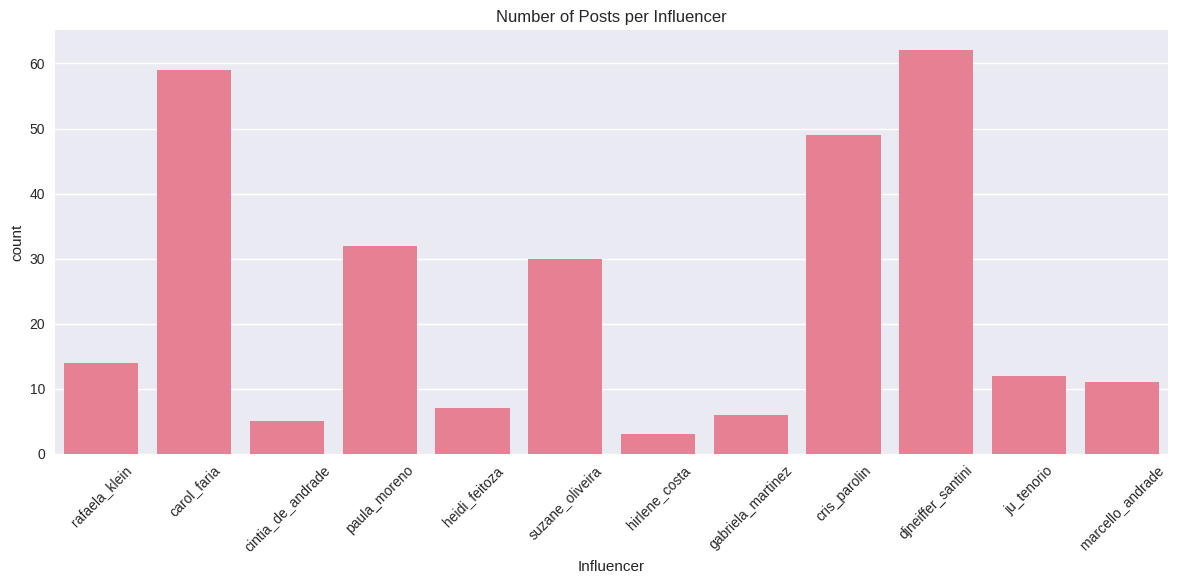

In [106]:
# Gráfico do número de reels postados por Influencer
# Graphic of number of reels posted by Influencer
plt.figure(figsize=(12, 6))
sns.countplot(data=data2, x='Influencer')
plt.title('Number of Posts per Influencer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📝 **Observações:** Os Influenciadores apresentam resultados bem diversos. Por exemplo:

* Gabriela Martinez perdeu seguidores, enquanto Marcello Andrade teve o maior ganho médio de seguidores. Isso mostra que o número de reels pode não estar associado ao maior ganho de seguidores, já que Marcello Andrade postou pouco mais de 10 reels, em contraste com outros que postaram mais de 20 e até mais de 30 reels.

* Carol Faria, Marcello Andrade e Djneiffer Santini têm o maior número total de seguidores.


📝 **Observations:** The influencers present very diverse results. For instance:

*   Gabriela Martinez mainly lost followers, while Marcello Andrade had the highest average gain of followers. This shows that number of reels might not be associated with highest follower gain, since Marcello Andrade posted only a bit more than 10 reels, contrasting with others who posted over 20 and even over 30 reels

*   Carol Faria, Marcello Andrade and Djneiffer Santini has the highest total followers



In [107]:
# Selecionando apenas variáveis numéricas e considerando apenas o quartil 25 e 75
# Selecting only numerical features and considering only quantile 25th and 75th percentile
Q1= data.select_dtypes(include=np.number).quantile(0.25)
Q3= data.select_dtypes(include=np.number).quantile(0.75)

In [108]:
# Calculando a porcentagem de outliers para cada variável
# Calculating outlier percentage for each feature
IQR = Q3 - Q1

lower_whisker = (
 Q1 - 1.5* IQR
)

upper_whisker = (
 Q3 + 1.5* IQR
)

(
data.select_dtypes(include=np.number)< lower_whisker | (data.select_dtypes(include=np.number) > upper_whisker)).sum()/data.select_dtypes(include=np.number).shape[0]*100

,0
Total_followers,0.000000
Followers_gained_clean,41.878173


In [109]:
# Guardando apenas colunas numéricas em novo objeto
# Storing numerical columns into a new variable
data_num= data.select_dtypes(include=np.number)

Total_followers
Skew : 2.09


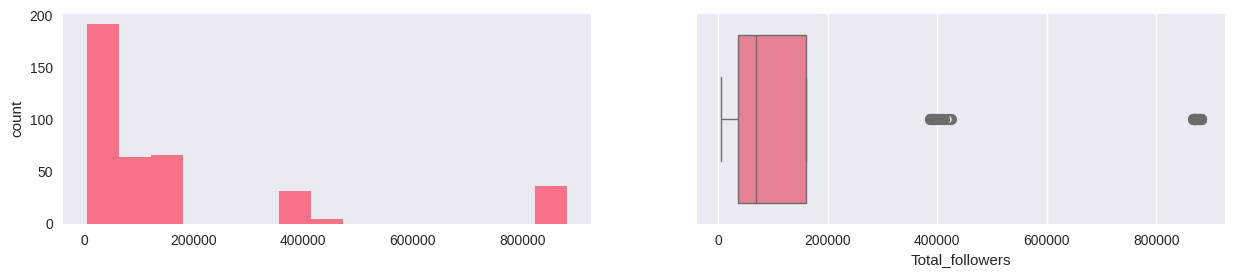

Followers_gained_clean
Skew : 2.73


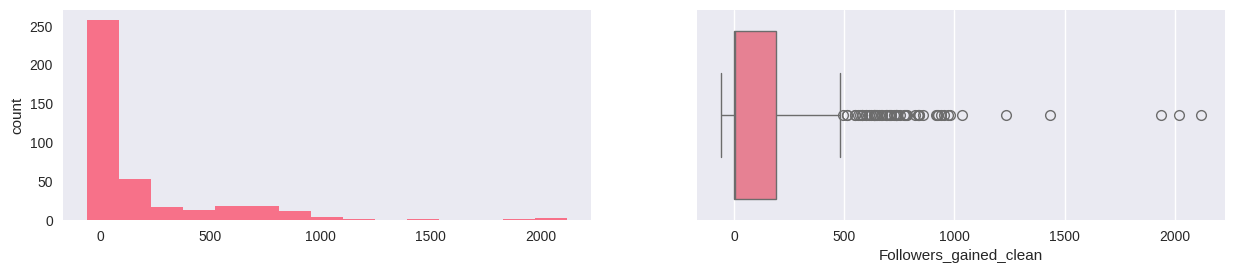

In [110]:
# Histograma and boxplot de cada variável numérica contendo seus respectivos valores de assimetria
# Histogram and boxplot for each numerical feature having their respective skewness values
for col in data_num.columns:
    print(col)
    print('Skew :',round(data_num[col].skew(),2))
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    data_num[col].hist(bins=15, grid=False)
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.boxplot(x=data_num[col])
    plt.show()

📝 **Observações:** No geral as nossa variáveis apresentam assimetria e outliers. Podemos destacar que:

*   O total de seguidores no geral está mais concentrado em valores menores, enquanto alguns são valores extremos altos

* Para o ganho de seguidores, no geral, novamente os valorese estão concentrados na parte inferior, havendo poucos outliers acima de 1000



📝 **Observations:** Overall, our variables exhibit asymmetry and outliers. We can highlight that:

* The total number of followers is generally more concentrated in lower values, while some are extremely high values

* For follower gain, again, the values ​​are concentrated in the lower part, with few outliers above 1000

### 🔍 Análise de dados bivariada | Bivariate data analysis

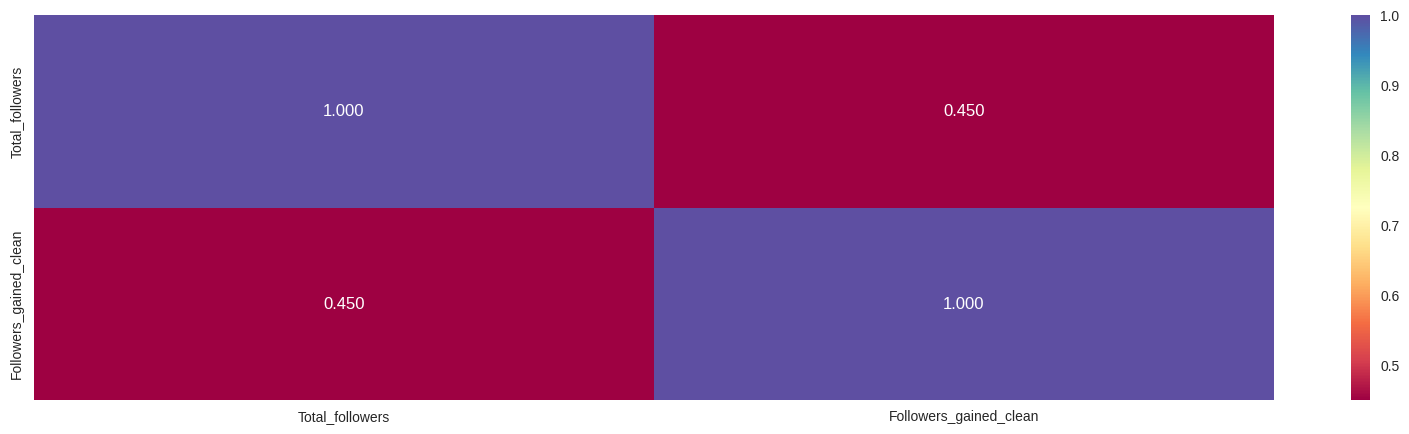

In [111]:
plt.figure(figsize=(20,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(),  #.corr to create a correlation between variables, sns.heatmap for a heatmap based on the correlations
            cmap='Spectral', annot=True, fmt='0.3f')  # annot=True to display correlation values on heatmap, fmt='0.1f for float type with one decimal place
plt.show()

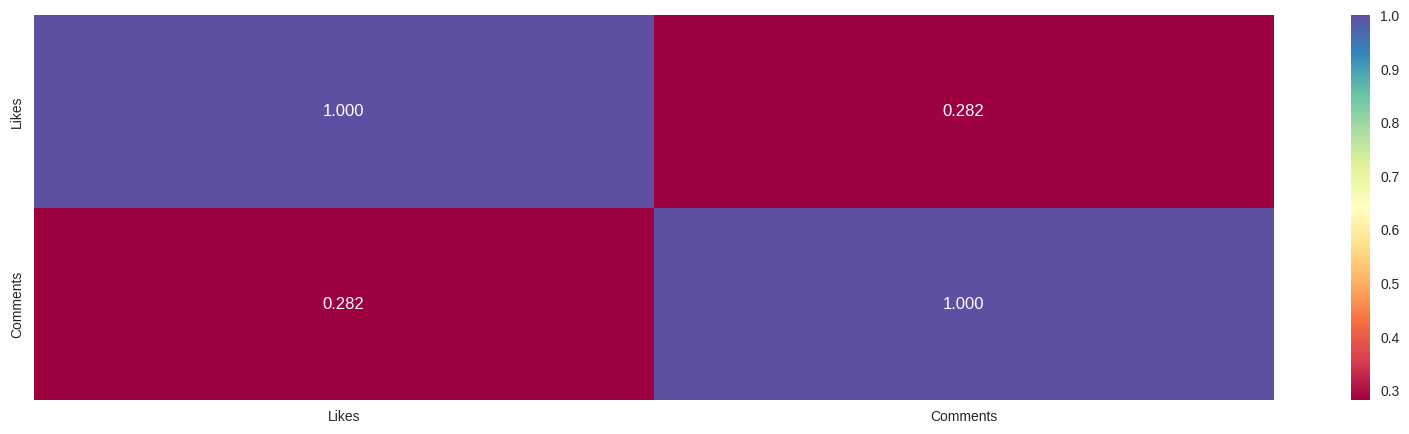

In [112]:
plt.figure(figsize=(20,5))
sns.heatmap(data2[['Likes','Comments']].corr(),  #.corr to create a correlation between variables, sns.heatmap for a heatmap based on the correlations
            cmap='Spectral', annot=True, fmt='0.3f')  # annot=True to display correlation values on heatmap, fmt='0.1f for float type with one decimal place
plt.show()

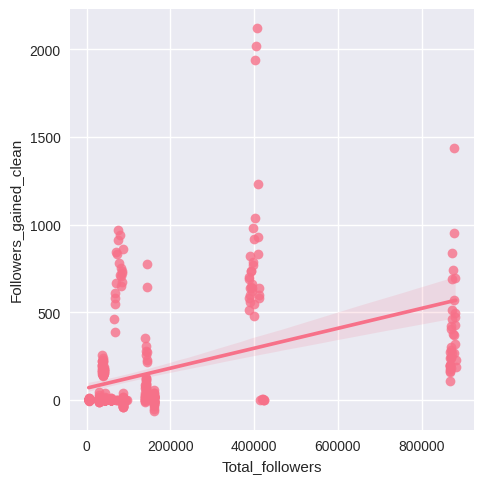

In [113]:
sns.lmplot (data= data, x= 'Total_followers',y='Followers_gained_clean')

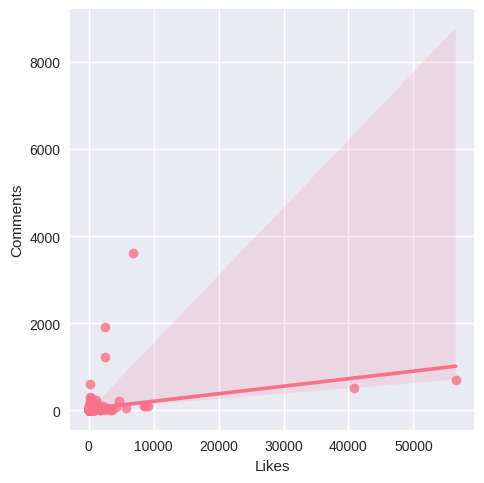

In [114]:
sns.lmplot (data= data2, x= 'Likes',y='Comments')

📝 **Observações:**  Aqui, vale destacar algumas relações:

*   Não existe correlação positiva curtidas e comentários, e entre ganho de seguidores e total de seguidores. Assim, influenciadores com maior número total de seguidores não necessariamente indica que estes ganham mais seguidores

*   Apesar da linha de regressão indicar uma tendência positiva para ambas as relações, é possível perceber que ela não explica bem a relação entre as variáveis



📝 **Observations:** Here, it is worth highlighting some relationships:

*   There is no positive correlation between likes and comments, and between gaining followers and total followers. Thus, influencers with a higher total number of followers do not necessarily mean they are gaining more followers.

* Although the regression line indicates a positive trend for both relationships, it is clear that it does not fully explain the relationship between the variables.


## **Análise estatística de dados** | **Statistical Data Analysis**

⚠️**Análise de métricas de crescimento e engajamento:** Iniciaremos aplicando as funções criadas para análise dos dados.

⚠️**Growth and engagement metrics analysis:** We'll begin applying the functions created for the analysis of the data.


📁 DATA PREVIEW:
Follower data shape: (394, 6)
Follower data columns: ['Day', 'Date', 'Followers_gained', 'Total_followers', 'Influencer', 'Followers_gained_clean']

Reel data shape: (290, 10)
Reel data columns: ['Media', 'PostLink', 'Content', 'Date', 'Type', 'Likes', 'Comments', 'Interactions', 'Engagement', 'Influencer']

✅ Created Net_followers_gained column in follower_data
   Sample values: [579.0, 510.0, 703.0, 687.0, 637.0]
✅ Added Net_followers_gained column:
   Successfully found values for 290/290 reels
   Missing values: 0
   Average Net_followers_gained: 232.8
   Max Net_followers_gained: 1938
   Min Net_followers_gained: -37
📊 INSTAGRAM ANALYTICS REPORT

📈 BASIC STATISTICS:
Total Reels Analyzed: 290
Number of Influencers: 12
Date Range: 2025-12-18 to 2026-01-24

❤️ ENGAGEMENT METRICS:
Average Likes: 761
Average Comments: 52
Average Comments-to-Likes Ratio: 11.99%
  (Industry Benchmark: >5% is good)

📈 GROWTH METRICS:
Average 3-Day Follower Gain: 441
Average 7-Day Follower

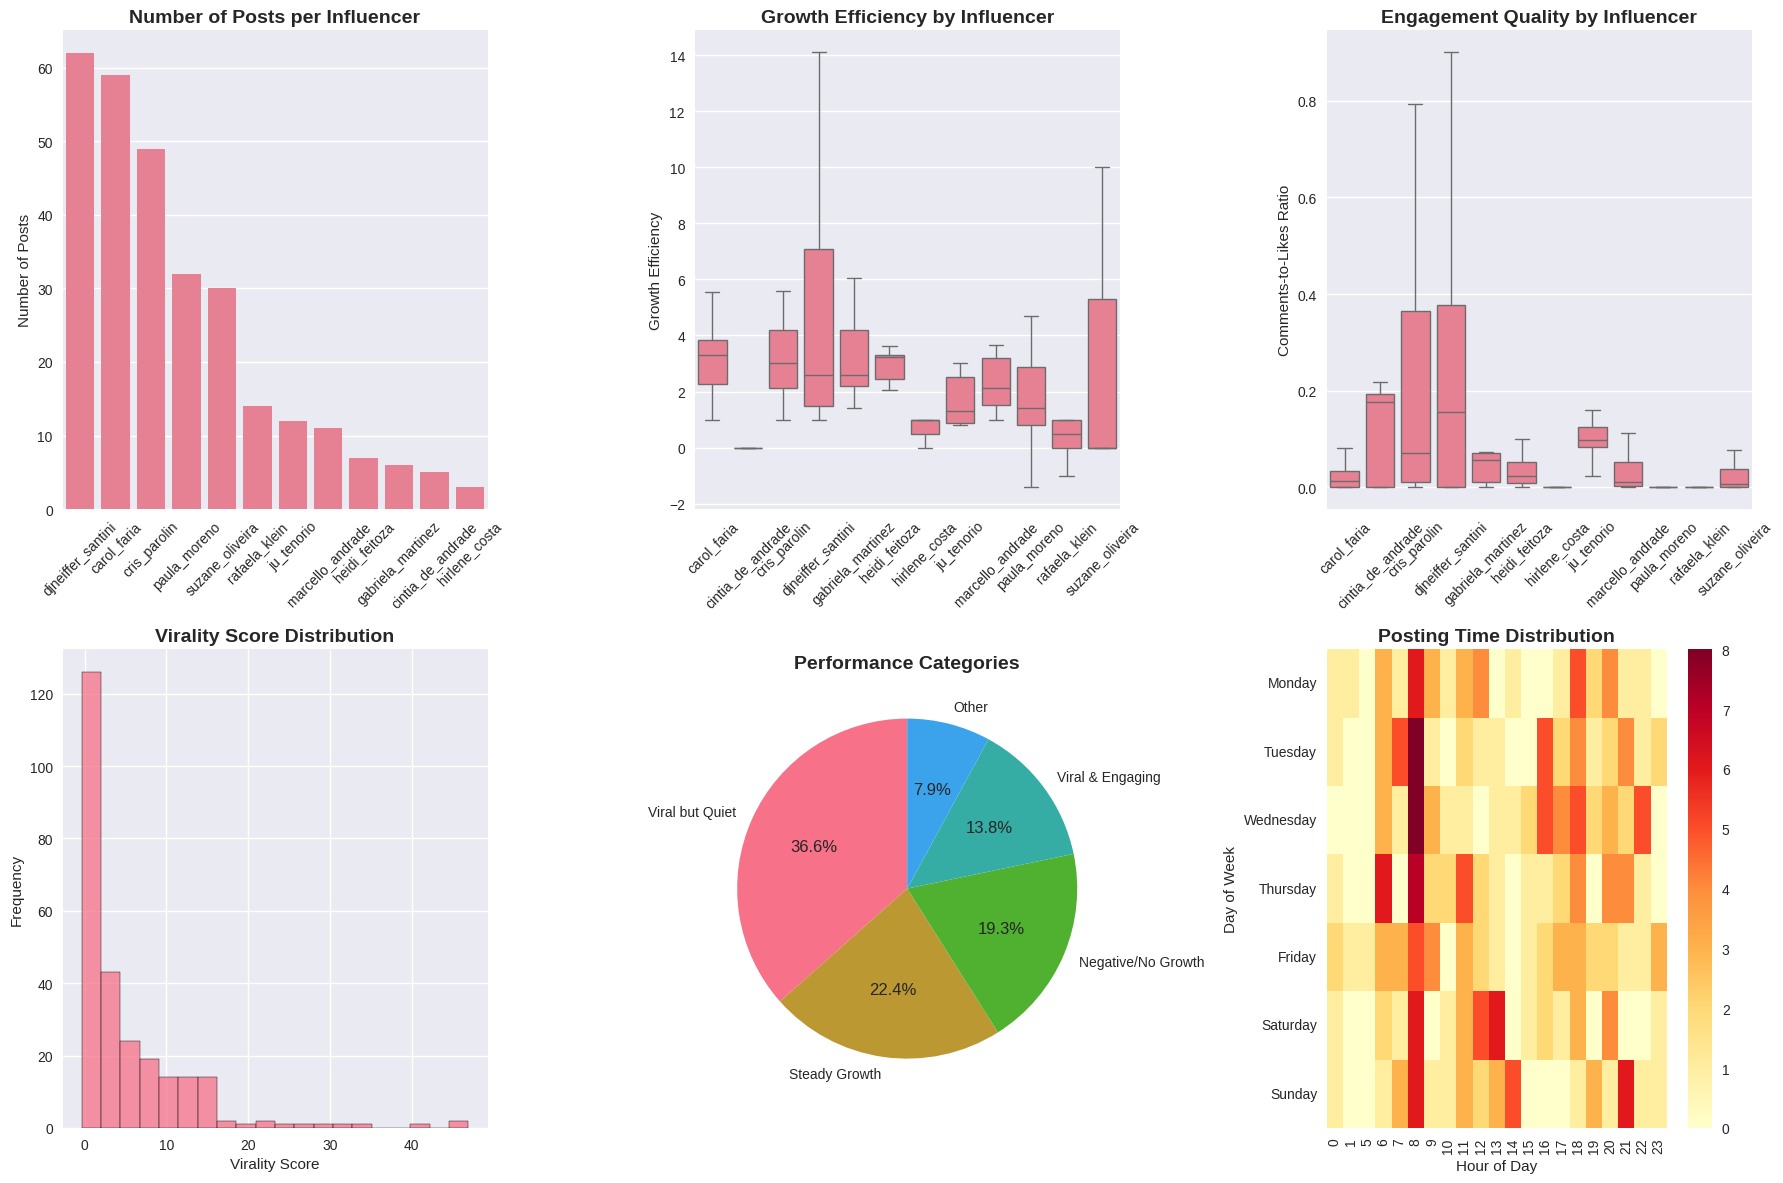

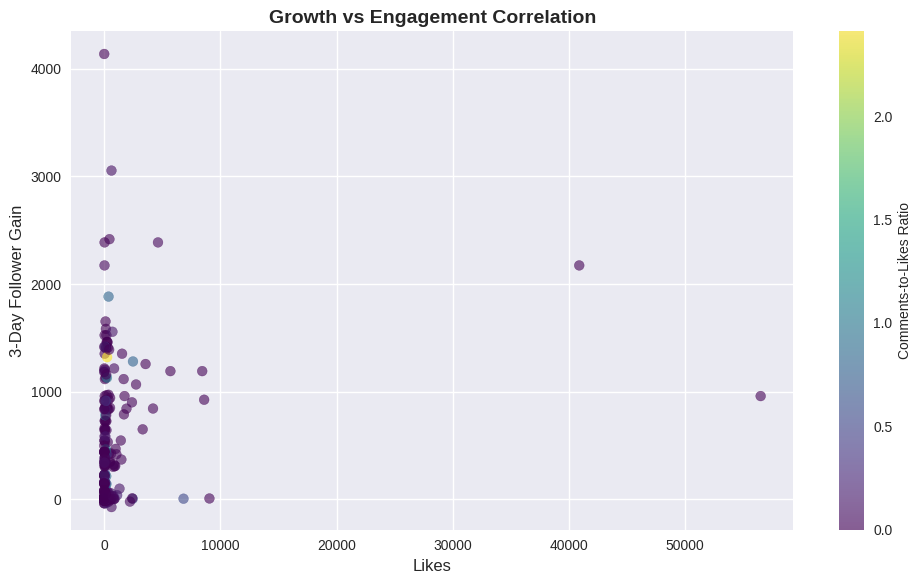


✅ ANALYSIS COMPLETE

Key Insights:
1. Analyzed 290 reels across 12 influencers
2. Average growth per reel: 441 followers
3. Best engagement ratio: 241.0%
4. Net_followers_gained added to final_df: 290 values found
5. Results exported to: instagram_analysis_results.csv


In [115]:
# Atribuir data à follower_data e data2 à reel_data
# Assign data to follower_data and data2 to reel_data
follower_data = data  # Your follower data
reel_data = data2    # Your reel data

# Rodar a função simplificada com as análises
# Run simplified function with the analysis
final_results = run_analysis(follower_data, reel_data)

📝 **Observações:**  Aqui podemos ver que:

*   36.6% de 290 reels analisados fiezram os influenciadores viralizarem no Instagram, mas de uma forma na qual as pessoas não interagiram muito com os reels. Então eles ganharam seguidores mas sem muito efeito em comentários e curtidas

*   40 outros reels viralizaram, mas também tiveram impacto positivo relacionado ao engajamento

*   Houve 65 reels que permitiram crescimento continuo ao invés de crescimento rápido no curto prazo

*   56 reels ou não geraram crescimento, ou estão associados à perda de seguidores

*   Mais da metade dos influenciadores (7 no total) postaram menos do que 10 reels, e aqueles que tiveram maior frequência de postagem, por exemplo, Djneiffer Santini, Carol Faria e Cris Parolin, também tiveram maior eficiência de crescimento no geral


*   Quando se trata de engajamento, Cintia de Andrade e Ju Tenorio tiveram maior engajamento no geral. Por outro lado, os maiores valores pertencem a Cris Parolin e Djneiffer Santini, uma com quase 0.8 e a outra acima de 0.8, respectivamente. Isso significa receber aproximadamente 80 comentários por cada 100 curtidas


*    Ganho de seguidores na janela temporal de 3 dias, curtidas e razão de comentários e curtidas não tiveram uma relação clara

*   Se tratando de horário de postagem, 8 da manhã foi o horário que eles mais postaram. Sexta-feira foi o dia com menor frequência de postagem e Quarta-feira o dia no qual mais postaram


📝 **Observations:** Here we can see that:

*    36.6% of the 290 reels analysed made influencers go viral on Instagram but in a way that people didn't interact much with the reel. Thus they gained followers without much effect on comments and likes


*   40 reels were viral but also had a positive impact
related to engagement

*   There were 65 reels that allowed steady growth instead of short-term growth spikes.

*   56 reels either didn't generate growth or are associated with followers loss


*   More than half of the Influencers (7 in total) posted less than 10 reels, and those that had the highest posting frequency, for instance, Djneiffer Santini, Carol Faria and Cris Parolin also had overall the highest growth efficiency



*   When it comes to engagement, Cintia de Andrade and Ju Tenorio had overall higher engagement than others. However, the highest values belong to Cris Parolin and Djneiffer Santini, one at almost 0.8 and the other above 0.8, respectively. This means receiving around 80 comments for every 100 likes


*   Follower gain in the 3 days time window, likes and comments-to-like ratio didnt't have a clear relationship

*   Concerning posting time, 8 in the morning was the time they mostly posted. Friday was the day they less posted and Wednesday the day the posted the most





⚠️**Análise da performance em relação ao passado:** Com a eficiência de crescimento, vemos o quanto cada reel permitiu cada influenciador crescer no Instagram a partir da postagem... Agora, iremos analisar como o ganho de número de seguidores na postagem do reel se comporta em relação ao padrão encontrado no dia anterior e também nos últimos 7 dias

⚠️**Performance analysis in relation to the past:** By growth efficiency we can see how much each reel allowed the influencer to grow on Instagram starting at the posting time... Now, we will analyze how follower gain at the reel posting time behaves in relation to the pattern found the day before and also in the last 7 days

In [116]:
# Aplicar função de preparar os dados de seguidores em follower_data
# Apply function to prepare followers data to followers_data
followers_data_with_net = prepare_follower_data(follower_data)

In [117]:
# Definir função para adicionar linha de base (dias no passado) para comparação do número de seguidores
# Define function to add baseline (days in the past) for comparison of number of followers

def add_baseline_columns(final_df, follower_data, baseline_window=7):
    """
    Add baseline comparison columns to final_df

    Parameters:
    -----------
    final_df : pd.DataFrame
        Your final dataframe with reel metrics including Net_followers_gained
    follower_data : pd.DataFrame
        Daily follower data with Net_followers_gained column
    baseline_window : int
        Number of days to look back for weighted rolling baseline (default: 7)

    Returns:
    --------
    pd.DataFrame with added baseline columns
    """

    # Fazendo cópias
    # Making copies
    final_df = final_df.copy()
    follower_data = follower_data.copy()

    # Certificando que datas estão no formato de data e hora
    # Ensuring dates are datetime
    final_df['Reel_Date'] = pd.to_datetime(final_df['Reel_Date'])
    follower_data['Date'] = pd.to_datetime(follower_data['Date'])

    # Organizar dados por Influenciador e date
    # Sort data by Influencer and date
    follower_data = follower_data.sort_values(['Influencer', 'Date'])

    print(f"Adding baseline columns...")
    print(f"Baseline window: {baseline_window} days for weighted rolling average")
    print(f"Also adding yesterday baseline")

    # Listas para guardar os resultados de linha de base default (7 dias), dia anterior como linha de base, e qualidade da linha de base (quantos dias foram usados)
    # Lists to store results default from baseline (7 days), yesterday's baseline and baseline quality (how many days were used)
    weighted_baselines = []
    yesterday_baselines = []
    baseline_qualities = []

    # Iteração em cada linha de final_df
    # Iteration in each line of final_df
    for idx, row in final_df.iterrows():
        influencer = row['Influencer']
        post_date = row['Reel_Date']

        # Dados históricos do influenciador
        # Influencer's historical data
        influencer_mask = follower_data['Influencer'] == influencer
        influencer_hist = follower_data[influencer_mask]

        # 1. Ontem como linha de base
        # 1. Yesterday as BASELINE
        yesterday_date = post_date - timedelta(days=1)
        yesterday_data = influencer_hist[influencer_hist['Date'] == yesterday_date]

        # Se não houver dados do dia anterior, retornar zero
        # Return zero if there is no data from yesterday
        if not yesterday_data.empty:
            yesterday_baseline = yesterday_data['Net_followers_gained'].iloc[0]
        else:
            yesterday_baseline = 0

        yesterday_baselines.append(yesterday_baseline)

        # 2. Linha de base rolante ponderada (múltiplos dias)
        # 2. Weighted Rolling Baseline (multiple days)
        baseline_start = post_date - timedelta(days=baseline_window)
        baseline_data = influencer_hist[
            (influencer_hist['Date'] >= baseline_start) &
            (influencer_hist['Date'] < post_date)
        ]

        if len(baseline_data) >= baseline_window:
            # Obter o ganho liquido de seguidores do dia mais recente da linha de base
            # Get the last net followers gained of the most recent day of the baseline
            recent_growth = baseline_data['Net_followers_gained'].tail(baseline_window).values

            # Criar peso (depreciação exponencial, mais recente = maior peso) e normalizar valores
            # Create weights (exponential decay, more recent = higher weight) and normalize values
            weights = np.exp(np.linspace(-1, 0, baseline_window))
            weights = weights / weights.sum()

            # Crescimento diário ponderado esperado de seguidores antes da postagem - Ou seja, crescimento usual antes da postagem
            # Weighted expected daily follower growth before the post - Meaning, usual growth before the post
            weighted_baseline = np.sum(recent_growth * weights)
            days_used = baseline_window
            quality = "Full"

            # Caso a linha de base possuir ao menos 1 dia mas não dias o suficiente, ex: linha de base de 7 dias, mas dados tem apenas 3 dias
            # In case baseline has at least 1 day but not enough days, for example: 7 days baseline but the data has only 3 days

        elif len(baseline_data) > 0:
            # Use todos os dias disponíveis
            # Use all available days
            recent_growth = baseline_data['Net_followers_gained'].values

            # Criar pesos proporcionais com relação a quantos dias estão disponíveis
            # Create proportional weights in relation to how many days are available
            available_weights = np.exp(np.linspace(-1, 0, len(recent_growth)))
            available_weights = available_weights / available_weights.sum()

            # Calculo da linha de base ponderada para reels com poucos dias disponíves na janela da linha de base
            # Calculation of weighted baseline for reels with a few days available in the baseline window
            weighted_baseline = np.sum(recent_growth * available_weights)
            days_used = len(recent_growth)
            quality = f"Partial ({days_used}/{baseline_window} days)"

        else:
            # Caso contrário, retornar zero e em qualidade 'sem dado'
            # Wherelse, return zero and quality equals 'no data'
            weighted_baseline = 0
            days_used = 0
            quality = "No data"

        weighted_baselines.append(weighted_baseline)
        baseline_qualities.append(quality)

    # Adicionar as colunas ao dataframe
    # Add columns to dataframe
    final_df[f'{baseline_window}day_weighted_baseline'] = weighted_baselines
    final_df['yesterday_baseline'] = yesterday_baselines
    final_df['baseline_quality'] = baseline_qualities

    # Cálculos de performance de crescimento comparado a linha de base
    # Calculations of growth performance compared to the baseline

    # 1. Razão para a linha de base ponderada - O quanto o reel gerou de crescimento em relação ao esperado (linha de base)
    # 1. Ratio to weighted baseline - how much the reel generated growth compared to the expectation (baseline)
    final_df[f'vs_weighted_baseline_ratio'] = np.where(
        final_df[f'{baseline_window}day_weighted_baseline'] != 0,
        final_df['Net_followers_gained'] / final_df[f'{baseline_window}day_weighted_baseline'],
        np.where(final_df['Net_followers_gained'] > 0, np.inf, 1)
    )

    # 2. Razão para a linha de base ponderada do dia anterior - O quanto o reel gerou de crescimento em relação ao esperado (linha de base dia anterior)
    # 2. Ratio to yesterday weighted baseline - how much the reel generated growth compared to the expectation (yesterday baseline)
    final_df['vs_yesterday_ratio'] = np.where(
        final_df['yesterday_baseline'] != 0,
        final_df['Net_followers_gained'] / final_df['yesterday_baseline'],
        np.where(final_df['Net_followers_gained'] > 0, np.inf, 1)
    )

    # 3. Diferença da linha de base ponderada - Quantos seguidores foram ganhos comparado a linha de base
    # 3. Difference from weighted baseline - how many followers were gained compared to the baseline
    final_df[f'vs_weighted_baseline_diff'] = (
        final_df['Net_followers_gained'] - final_df[f'{baseline_window}day_weighted_baseline']
    )

    # 4. Diferença da linha de base ponderada do dia anterior - Quantos seguidores foram ganhos comparado a linha de base do dia anterior
    # 4. Difference from yesterday weighted baseline - how many followers were gained compared to yesterday baseline
    final_df['vs_yesterday_diff'] = (
        final_df['Net_followers_gained'] - final_df['yesterday_baseline']
    )

    # Identificar se há valores infinitos, se existem substituir por 2x o valor máximo da razão encontrada. Se os valores forem zero torne 10 o número default
    # Identify if there are infinite values, if they exist replace by 2x the maximum ratio found. If the values are zero make 10 the default
    inf_mask_weighted = final_df[f'vs_weighted_baseline_ratio'] == np.inf
    inf_mask_yesterday = final_df['vs_yesterday_ratio'] == np.inf

    if inf_mask_weighted.any():
        max_finite = final_df.loc[~inf_mask_weighted, f'vs_weighted_baseline_ratio'].max()
        final_df.loc[inf_mask_weighted, f'vs_weighted_baseline_ratio'] = max_finite * 2 if max_finite > 0 else 10

    if inf_mask_yesterday.any():
        max_finite = final_df.loc[~inf_mask_yesterday, 'vs_yesterday_ratio'].max()
        final_df.loc[inf_mask_yesterday, 'vs_yesterday_ratio'] = max_finite * 2 if max_finite > 0 else 10

    # Categorização da performance
    # Categorization of performance
    conditions = [
        final_df[f'vs_weighted_baseline_ratio'] < 0.5,
        final_df[f'vs_weighted_baseline_ratio'] < 0.8,
        final_df[f'vs_weighted_baseline_ratio'] < 1.2,
        final_df[f'vs_weighted_baseline_ratio'] < 2.0,
        final_df[f'vs_weighted_baseline_ratio'] < 5.0,
        final_df[f'vs_weighted_baseline_ratio'] >= 5.0
    ]

    choices = [
        'Very Poor (<0.5x)',
        'Poor (0.5-0.8x)',
        'Average (0.8-1.2x)',
        'Good (1.2-2.0x)',
        'Excellent (2.0-5.0x)',
        'Exceptional (>5.0x)'
    ]

    # Aplicar a categorização nos dados
    # Apply categorization on the data
    final_df['weighted_baseline_performance'] = np.select(conditions, choices, default='Average (0.8-1.2x)')


    conditions_yesterday = [
        final_df['vs_yesterday_ratio'] < 0.5,
        final_df['vs_yesterday_ratio'] < 0.8,
        final_df['vs_yesterday_ratio'] < 1.2,
        final_df['vs_yesterday_ratio'] < 2.0,
        final_df['vs_yesterday_ratio'] < 5.0,
        final_df['vs_yesterday_ratio'] >= 5.0
    ]

    final_df['yesterday_baseline_performance'] = np.select(conditions_yesterday, choices, default='Average (0.8-1.2x)')

    # Prints do resumo
    # Print summary
    print(f"\n✅ Baseline analysis complete")
    print(f"   Added columns:")
    print(f"     - {baseline_window}day_weighted_baseline: Weighted average of past {baseline_window} days")
    print(f"     - yesterday_baseline: Net followers gained on day before reel")
    print(f"     - vs_weighted_baseline_ratio: Ratio of reel day to weighted baseline")
    print(f"     - vs_yesterday_ratio: Ratio of reel day to yesterday")
    print(f"     - And 5 more comparison metrics")

    print(f"\n📊 BASELINE QUALITY:")
    quality_counts = final_df['baseline_quality'].value_counts()
    for quality, count in quality_counts.items():
        pct = count / len(final_df) * 100
        print(f"   {quality}: {count} reels ({pct:.1f}%)")

    print(f"\n📈 PERFORMANCE DISTRIBUTION (vs weighted baseline):")
    performance_counts = final_df['weighted_baseline_performance'].value_counts()
    for perf, count in performance_counts.items():
        pct = count / len(final_df) * 100
        print(f"   {perf}: {count} reels ({pct:.1f}%)")

    print(f"\n📊 COMPARISON STATS:")
    print(f"   Average Net_followers_gained: {final_df['Net_followers_gained'].mean():.1f}")
    print(f"   Average {baseline_window}-day weighted baseline: {final_df[f'{baseline_window}day_weighted_baseline'].mean():.1f}")
    print(f"   Average yesterday baseline: {final_df['yesterday_baseline'].mean():.1f}")
    print(f"   Average vs weighted baseline ratio: {final_df[f'vs_weighted_baseline_ratio'].mean():.2f}x")
    print(f"   Average vs yesterday ratio: {final_df['vs_yesterday_ratio'].mean():.2f}x")

    return final_df

In [118]:
# Adicionar as colunas relacionadas à métricas de linha de base à dataframe final
# Add columns related to baseline metrics to the final dataframe

final_results_with_baselines = add_baseline_columns(
    final_df=final_results,
    follower_data=followers_data_with_net,
    baseline_window=7
)

# Checando quais colunas foram adicionadas
# Checking which new columns were added
print("\nNew columns added:")
new_columns = [col for col in final_results_with_baselines.columns
               if any(keyword in col.lower() for keyword in ['baseline', 'ratio', 'vs', 'performance'])]
print(new_columns)

Adding baseline columns...
Baseline window: 7 days for weighted rolling average
Also adding yesterday baseline

✅ Baseline analysis complete
   Added columns:
     - 7day_weighted_baseline: Weighted average of past 7 days
     - yesterday_baseline: Net followers gained on day before reel
     - vs_weighted_baseline_ratio: Ratio of reel day to weighted baseline
     - vs_yesterday_ratio: Ratio of reel day to yesterday
     - And 5 more comparison metrics

📊 BASELINE QUALITY:
   Full: 217 reels (74.8%)
   No data: 41 reels (14.1%)
   Partial (1/7 days): 8 reels (2.8%)
   Partial (2/7 days): 7 reels (2.4%)
   Partial (3/7 days): 5 reels (1.7%)
   Partial (6/7 days): 5 reels (1.7%)
   Partial (5/7 days): 4 reels (1.4%)
   Partial (4/7 days): 3 reels (1.0%)

📈 PERFORMANCE DISTRIBUTION (vs weighted baseline):
   Average (0.8-1.2x): 94 reels (32.4%)
   Very Poor (<0.5x): 59 reels (20.3%)
   Exceptional (>5.0x): 46 reels (15.9%)
   Good (1.2-2.0x): 41 reels (14.1%)
   Poor (0.5-0.8x): 31 reels

📝**Observações:**

* 74.8% de todos os reels tiveram uma janela de referência completa, ou seja, 7 dias no passado para comparação. 41 reels não tiveram nenhum dia para comparação e poucos reels tiveram dias parciais

* 63.4% dos reels tiveram desempenho médio, ruim ou muito ruim em comparação com o padrão dos últimos 7 dias, enquanto 36.6% tiveram desempenho bom, excelente ou excepcional


📝**Observations:**

*   74.8% of all reels had full baseline window, meaning 7 days in the past for comparison. 41 reels didn't have any days for comparison, and few reels had partial days

*   63.4% of the reels either had average, poor or very poor performance
compared to the pattern of the last 7 days, while 36.6% were either good, excelent or exceptional



## **Filtragem dos reels que melhor performaram** | **Outperforming reels filtering**

⚠️**Filtragem dos reels que melhor performaram:** Aqui iremos selecionar reels que se adequam aos critérios de:

*   Ter desempenho bom, excelente ou excepcional em relação ao padrão dos últimos 7 dias

*   Ao menos 3 dias passados de ganho de seguidores para comparação

*   Eficiência de crescimento maior do que um (crescimento a longo prazo supera o de curto prazo)


*   Porcentagem de retenção de crescimento acima de 100 (crescimento acelerou após a postagem)


⚠️**Outperforming reels filtering:** Here we will select reels that meet the following criteria:

* Good, excellent, or exceptional performance compared to the standard of the last 7 days

* At least the past 3 days of follower gain for comparison

* Growth efficiency greater than one (long-term growth surpasses short-term growth)

* Growth retention percentage above 100 (growth accelerated after posting)



In [119]:
# Extrair o número de dias passados disponíveis na janela temporal de 7 dias e criar nova coluna
# Extract the number of past days available in the 7days time window and create a new column
final_results_with_baselines['partial_days'] = (
    final_results_with_baselines['baseline_quality']
    .str.extract(r'(\d)/7')
    .astype(float)
)

In [120]:
# Filtragem dos reels que melhor performaram
# Filtering of the top performing reels
filtered_df = final_results_with_baselines[
    (final_results_with_baselines['weighted_baseline_performance'].isin(['Good (1.2-2.0x)','Excellent (2.0-5.0x)', 'Exceptional (>5.0x)'])) &
    (final_results_with_baselines['partial_days'] >=3) &
    (final_results_with_baselines['yesterday_baseline'].notna()) &
    (final_results_with_baselines['yesterday_baseline'] != 0) &
    (final_results_with_baselines['growth_efficiency'] > 1) &
    (final_results_with_baselines['growth_retention_pct'] > 100)

]

# Aviso de quantos reels atenderam aos critérios
# Message of how many reels met the criteria
print(f"Found {len(filtered_df)} reels meeting all criteria")


Found 4 reels meeting all criteria


In [121]:
# Organizar os resultados em ordem decrescente de growth_efficiency
# Sort by growth_efficiency in descending order
filtered_sorted = filtered_df.sort_values('growth_efficiency', ascending=False)

# Mostrar todos os reels e colunas específicas
# Display all the reels and the specified columns
filtered_sorted[['Reel_Date', 'PostLink', 'growth_efficiency', 'Influencer',
                 'Net_followers_gained', '7day_weighted_baseline', 'yesterday_baseline',
                 'baseline_quality', 'vs_weighted_baseline_ratio', 'vs_yesterday_ratio',
                 'vs_weighted_baseline_diff', 'weighted_baseline_performance',
                 'yesterday_baseline_performance']].head(19)

,Reel_Date,PostLink,growth_efficiency,Influencer,Net_followers_gained,7day_weighted_baseline,yesterday_baseline,baseline_quality,vs_weighted_baseline_ratio,vs_yesterday_ratio,vs_weighted_baseline_diff,weighted_baseline_performance,yesterday_baseline_performance
81,2025-12-29,https://www.instagram.com/reel/DS2FDTyFM29/,4.227231,cris_parolin,668.0,540.628414,612.0,Partial (5/7 days),1.235599,1.091503,127.371586,Good (1.2-2.0x),Average (0.8-1.2x)
82,2025-12-30,https://www.instagram.com/reel/DS4pwB9Fay4/,3.256973,cris_parolin,841.0,570.424622,668.0,Partial (6/7 days),1.474340,1.258982,270.575378,Good (1.2-2.0x),Good (1.2-2.0x)
125,2025-12-27,https://www.instagram.com/reel/DSw87ktEWQk/,1.272727,djneiffer_santini,12.0,3.608628,15.0,Partial (5/7 days),3.325363,0.800000,8.391372,Excellent (2.0-5.0x),Average (0.8-1.2x)
126,2025-12-28,https://www.instagram.com/reel/DSzWxxqDhbA/,1.109589,djneiffer_santini,66.0,5.683123,12.0,Partial (6/7 days),11.613333,5.500000,60.316877,Exceptional (>5.0x),Exceptional (>5.0x)


📝**Observações:**

*   De todos os 290 reels, apenas 4 deles atenderam aos critérios selecionados

*   Apesar de haver uma diferença muito grande de valores da comparação com a  linha de base dos últimos 7 dias entre Cris Parolin e Djneiffer Santini, como a comparação é com os últimos 7 dias do próprio influenciador, isso significa que anteriormente à 27/12/2025 Djneiffer Santini estava performando mal e a partir dessa data e postagem de dois reels, houve uma quebra drástica do padrão anterior

*   Além de quebrarem padrões ruins ou mais fracos de ganho de seguidores dos últimos 7 dias, os 4 reels selecionados também tiveram aceleração no crescimento após a postagem que se prolongou ao longo do tempo


*   Porcentagem de retenção de crescimento acima de 100 (crescimento acelerou após a postagem)


📝**Observations:**

*   Of all 290 reels, only 4 met the selected criteria

* Although there is a very large difference in values ​​compared to the baseline of the last 7 days between Cris Parolin and Djneiffer Santini, since the comparison is with the influencer's own last 7 days, this means that prior to 2025-12-27 Djneiffer Santini was performing poorly, and from that date and the posting of two reels, there was a drastic break from the previous pattern

* In addition to breaking bad or weaker patterns of follower gain over the last 7 days, the 4 selected reels also showed accelerated growth after posting, which continued over time

## **Clusterização dos reels** | **Reels clustering**

⚠️**Clusterização dos reels:** Aqui iremos agrupar os reels em clusters baseados em comportamento semelhante de métricas: ganho de seguidores na janela de 3 dias futuros, eficiência de crescimento, pontuação de viralização, razão entre comentários e curtidas, e pontuação de engajamento

*   Primeiramente, criaremos categorização em relação a recência do reel: arquivo de referência (+ de 31 dias atrás), ultrapassado mas eficiente (entre 22 e 30 dias atrás), com performance estável (entre 8 e 21 dias atrás), oportunidades atuais (entre 0 e 7 dias atrás) e data desconhecida

*   Através da media das métricas analisadas e da categorização de recência, serão criados clusters: Prioridade A indicam reels mais atuais e com tendência de crescimento, Prioridade B indicam reels com padrão de crescimento bem estabelecido, Prioridade C indicam reels com baixa competição e os de prioridade D indicam reels saturados (alta competição)

*  A métrica de pontuação de atualidade é uma combinação de 4 outras métricas: Pontuação de Recência mede a atualidade da publicação, dando maior peso ao conteúdo publicado nos últimos 30 dias. Pontuação de Desempenho compara o crescimento de curto prazo do reel (ganho total em 3 dias) com o de melhor desempenho, capturando a força inicial de tração.Pontuação de Velocidade reflete a rapidez com que o cluster está crescendo atualmente, premiando clusters onde o ímpeto está acelerando. Pontuação de Densidade penaliza clusters superlotados, favorecendo ideias com menos concorrência e mais espaço criativo.  


⚠️**Reels clustering:** Here we will group reels into clusters based on similar metric behavior: follower gain in the next 3 days, growth efficiency, viral score, comment-to-like ratio, and engagement score.

* First, we will create a categorization based on reel recency: reference archive (more than 31 days ago), outdated but efficient (between 22 and 30 days ago), with stable performance (between 8 and 21 days ago), current opportunities (between 0 and 7 days ago), and unknown date.

* Through the average of the analyzed metrics and the recency categorization, clusters will be created: Priority A indicates more recent reels with a growth trend, Priority B indicates reels with a well-established growth pattern, Priority C indicates reels with low competition, and Priority D indicates saturated reels (high competition).

* The freshness score metric is a combination of 4 other metrics: Recency Score measures the recency of the publication, giving greater weight to content published in the last 30 days. Performance Score compares the short-term growth of the reel (total gain in 3 days) with that of the best performer, capturing the initial momentum. Velocity Score reflects how quickly the cluster is currently growing, rewarding clusters where momentum is accelerating. Density Score penalizes overcrowded clusters, favoring ideas with less competition and more creative space.

In [122]:
# Definir semente para reprodutibilidade
# Set seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Fazendo cópia da dataframe final
# Making a copy of the final dataframe
df = final_results_with_baselines.copy()

# =============================================================================
# 1. LIDANDO COM DATA E RECÊNCIA
# 1. DATE HANDLING & RECENCY
# =============================================================================

df['Reel_Date'] = pd.to_datetime(df['Reel_Date'], errors='coerce')

current_date = pd.Timestamp.now().normalize()

df['Days_Since_Post'] = (current_date - df['Reel_Date']).dt.days
df.loc[df['Reel_Date'].isna(), 'Days_Since_Post'] = 999


def assign_recency_tier(days):
    if days == 999:
        return 'Unknown Date'
    elif days <= 7:
        return 'Fresh Opportunities (0-7 days)'
    elif days <= 21:
        return 'Stable Performers (8-21 days)'
    elif days <= 30:
        return 'Aging But Effective (22-30 days)'
    else:
        return 'Archive Reference (31+ days)'


df['Recency_Tier'] = df['Days_Since_Post'].apply(assign_recency_tier)

# =============================================================================
# 2. CLUSTERIZAÇÃO (SOMENTE SINAIS DE PERFORMANCE)
# 2. CLUSTERING (PERFORMANCE SIGNALS ONLY)
# =============================================================================

cluster_columns = [
    '3day_total_gain',
    'growth_efficiency',
    'virality_score',
    'comments_to_likes_ratio',
    'engagement_score'
]

cluster_features = df[cluster_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

n_clusters = min(5, len(df) - 1)

if n_clusters > 1:
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=RANDOM_SEED,
        n_init=10
    )
    df['Performance_Cluster'] = kmeans.fit_predict(scaled_features)
else:
    df['Performance_Cluster'] = 0

# =============================================================================
# 3. DENSIDADE DO CLUSTER (SINAL DE SATURAÇÃO)
# 3. CLUSTER DENSITY (SATURATION SIGNAL)
# =============================================================================

recent_mask = df['Days_Since_Post'] <= 21

if recent_mask.any():
    cluster_density_map = (
        df[recent_mask]['Performance_Cluster']
        .value_counts()
        .to_dict()
    )
else:
    cluster_density_map = df['Performance_Cluster'].value_counts().to_dict()

df['Cluster_Density'] = df['Performance_Cluster'].map(cluster_density_map)

# =============================================================================
# 4. PERFIS DE CLUSTER E LEGENDAS
# 4. CLUSTER PROFILES & LABELS
# =============================================================================

cluster_profiles = df.groupby('Performance_Cluster').agg({
    '3day_total_gain': 'mean',
    'growth_efficiency': 'mean',
    'comments_to_likes_ratio': 'mean',
    'engagement_score': 'mean',
    'Cluster_Density': 'first'
}).round(3)


def label_cluster(row):
    if row['growth_efficiency'] > 1.2 and row['comments_to_likes_ratio'] > 0.05:
        return 'High-Conversion Content'
    elif row['3day_total_gain'] > cluster_profiles['3day_total_gain'].mean():
        return 'Viral Reach Content'
    elif row['engagement_score'] > cluster_profiles['engagement_score'].mean():
        return 'Engagement-Driven Content'
    else:
        return 'Balanced Performers'


cluster_labels = cluster_profiles.apply(label_cluster, axis=1).to_dict()
df['Cluster_Type'] = df['Performance_Cluster'].map(cluster_labels)

# =============================================================================
# 5. VELOCIDADE DO CLUSTER (ACELERAÇÃO DA TENDÊNCIA)
# 5. CLUSTER VELOCITY (TREND ACCELERATION)
# =============================================================================

recent_mask = df['Days_Since_Post'] <= 14
older_mask = (df['Days_Since_Post'] > 14) & (df['Days_Since_Post'] <= 28)

if recent_mask.any() and older_mask.any():
    recent_perf = df[recent_mask].groupby('Performance_Cluster')['3day_total_gain'].mean()
    older_perf = df[older_mask].groupby('Performance_Cluster')['3day_total_gain'].mean()

    cluster_velocity = {}
    for c in recent_perf.index:
        if c in older_perf.index and older_perf[c] > 0:
            cluster_velocity[c] = recent_perf[c] / older_perf[c]
        else:
            cluster_velocity[c] = 1.0
else:
    cluster_velocity = {c: 1.0 for c in df['Performance_Cluster'].unique()}

df['Cluster_Velocity'] = df['Performance_Cluster'].map(cluster_velocity)

# =============================================================================
# 6. PONTUAÇÃO DE ATUALIDADE (TENDÊCIA + OPORTUNIDADE)
# 6. FRESHNESS SCORE (TREND + OPPORTUNITY)
# =============================================================================

def calculate_freshness_score(row):
    recency_score = max(0, 1 - row['Days_Since_Post'] / 30)

    max_gain = df['3day_total_gain'].max()
    performance_score = row['3day_total_gain'] / max_gain if max_gain > 0 else 0

    velocity_score = min(row['Cluster_Velocity'], 2) / 2

    max_density = df['Cluster_Density'].max()
    density_score = 1 - (row['Cluster_Density'] / max_density) if max_density > 0 else 1

    return (
        0.4 * recency_score +
        0.3 * performance_score +
        0.15 * velocity_score +
        0.15 * density_score
    )


df['Freshness_Score'] = df.apply(calculate_freshness_score, axis=1)

# =============================================================================
# 7. ATRIBUINDO PRIORIADE (TENDÊNCIA NÃO-SATURADAS)
# 7. PRIORITY ASSIGNMENT (UNSATURATED TRENDS)
# =============================================================================

def assign_priority(row):
    if (
        row['Days_Since_Post'] <= 7 and
        row['Cluster_Velocity'] > 1.2 and
        row['Cluster_Density'] <= df['Cluster_Density'].median()
    ):
        return 'PRIORITY A: Fresh & Accelerating Cluster'

    elif (
        row['Days_Since_Post'] <= 21 and
        row['Freshness_Score'] > 0.6 and
        row['Cluster_Density'] <= df['Cluster_Density'].quantile(0.6)
    ):
        return 'PRIORITY B: Proven Cluster Pattern'

    elif (
        row['Days_Since_Post'] <= 30 and
        row['Cluster_Density'] <= df['Cluster_Density'].quantile(0.3)
    ):
        return 'PRIORITY C: Low-Competition Cluster'

    else:
        return 'PRIORITY D: Saturated Cluster'


df['Priority_Level'] = df.apply(assign_priority, axis=1)

# =============================================================================
# 8. RESULTADO DE SÁIDA
# 8. OUTPUT
# =============================================================================

print(f"\n{'='*80}")
print("SMART 30-DAY ANALYSIS WITH CLUSTER DENSITY")
print(f"{'='*80}")

print(f"\n📊 RECENCY DISTRIBUTION:")
for tier, count in df['Recency_Tier'].value_counts().items():
    print(f"  {tier}: {count} reels")

print(f"\n🏆 TOP 10 RECOMMENDATIONS (by Freshness Score):")

recommendation_cols = [
    'Influencer', 'Reel_Date', 'Days_Since_Post',
    'Cluster_Type', '3day_total_gain',
    'Cluster_Density', 'Freshness_Score', 'Priority_Level'
]

print(df.nlargest(10, 'Freshness_Score')[recommendation_cols].to_string(index=False))

print(f"\n💡 PRIORITY BREAKDOWN:")
for p, c in df['Priority_Level'].value_counts().items():
    print(f"  {p}: {c} reels")

print(f"\n{'='*80}")
print("STRATEGIC INSIGHTS")
print(f"{'='*80}")

priority_a = df[df['Priority_Level'] == 'PRIORITY A: Fresh & Accelerating Cluster']

if not priority_a.empty:
    print(f"\n💎 TOP PRIORITY OPPORTUNITIES:")
    print(f"  Found {len(priority_a)} reels with fresh, accelerating patterns")
    print(f"  Avg 3-day gain: {priority_a['3day_total_gain'].mean():.0f}")

    for ct, cnt in priority_a['Cluster_Type'].value_counts().items():
        avg_gain = priority_a[priority_a['Cluster_Type'] == ct]['3day_total_gain'].mean()
        print(f"    • {ct}: {cnt} reels, avg {avg_gain:.0f}")

print(f"\n🎯 FINAL RECOMMENDATION:")
if not priority_a.empty:
    print(f"  Focus on replicating PRIORITY A content patterns")
else:
    print(f"  Focus on PRIORITY B proven formats")

print(f"\n✅ Analysis completed successfully!")


SMART 30-DAY ANALYSIS WITH CLUSTER DENSITY

📊 RECENCY DISTRIBUTION:
  Archive Reference (31+ days): 150 reels
  Aging But Effective (22-30 days): 90 reels
  Stable Performers (8-21 days): 50 reels

🏆 TOP 10 RECOMMENDATIONS (by Freshness Score):
       Influencer  Reel_Date  Days_Since_Post            Cluster_Type  3day_total_gain  Cluster_Density  Freshness_Score                      Priority_Level
 marcello_andrade 2026-01-09               30     Viral Reach Content           4139.0              7.0         0.497368 PRIORITY C: Low-Competition Cluster
djneiffer_santini 2026-01-18               21     Viral Reach Content           1416.0              7.0         0.420002 PRIORITY C: Low-Competition Cluster
djneiffer_santini 2026-01-18               21     Viral Reach Content           1416.0              7.0         0.420002 PRIORITY C: Low-Competition Cluster
 marcello_andrade 2026-01-08               31     Viral Reach Content           3055.0              7.0         0.418799      

In [123]:
# Seleção de reels pertencentes ao cluster de prioridade A e C
# Reels selection belonging to cluster of priority A and C
reels_selected = df[
    df['Priority_Level'].isin([
        'PRIORITY C: Low-Competition Cluster',
        'PRIORITY A: Fresh & Accelerating Cluster'
    ])  ]

In [124]:
# Filtragem dos reels que melhor performaram
# Filtering of the top performing reels
reels_selected_final = reels_selected[
    (reels_selected['weighted_baseline_performance'].isin(['Good (1.2-2.0x)','Excellent (2.0-5.0x)', 'Exceptional (>5.0x)'])) &
    (reels_selected['yesterday_baseline'].notna()) &
    (reels_selected['yesterday_baseline'] != 0) &
    (reels_selected['growth_efficiency'] > 4) &
    (reels_selected['growth_retention_pct'] > 100)

]

# Aviso de quantos reels atenderam aos critérios
# Message of how many reels met the criteria
print(f"Found {len(reels_selected_final)} reels meeting all criteria")

Found 3 reels meeting all criteria


In [125]:
# Organizar os resultados em ordem decrescente de growth_efficiency
# Sort by growth_efficiency in descending order
reels_selected_final = reels_selected_final.sort_values('growth_efficiency', ascending=False)

# Mostrar todos os reels e colunas específicas
# Display all the reels and the specified columns
reels_selected_final[['Reel_Date', 'PostLink', 'growth_efficiency', 'Influencer',
                 'Net_followers_gained', '7day_weighted_baseline', 'yesterday_baseline',
                 'vs_weighted_baseline_ratio', 'Priority_Level','Recency_Tier',
                  'weighted_baseline_performance',
                 ]].head()

,Reel_Date,PostLink,growth_efficiency,Influencer,Net_followers_gained,7day_weighted_baseline,yesterday_baseline,vs_weighted_baseline_ratio,Priority_Level,Recency_Tier,weighted_baseline_performance
232,2026-01-13,https://www.instagram.com/reel/DTdCcgSDJqU/,48.0,paula_moreno,14.0,1.302593,2.0,10.747795,PRIORITY C: Low-Competition Cluster,Aging But Effective (22-30 days),Exceptional (>5.0x)
233,2026-01-13,https://www.instagram.com/reel/DTgUcLXDOp9/,48.0,paula_moreno,14.0,1.302593,2.0,10.747795,PRIORITY C: Low-Competition Cluster,Aging But Effective (22-30 days),Exceptional (>5.0x)
234,2026-01-14,https://www.instagram.com/reel/DTr9aCvDJkO/,14.0,paula_moreno,7.0,3.529578,14.0,1.983240,PRIORITY C: Low-Competition Cluster,Aging But Effective (22-30 days),Good (1.2-2.0x)


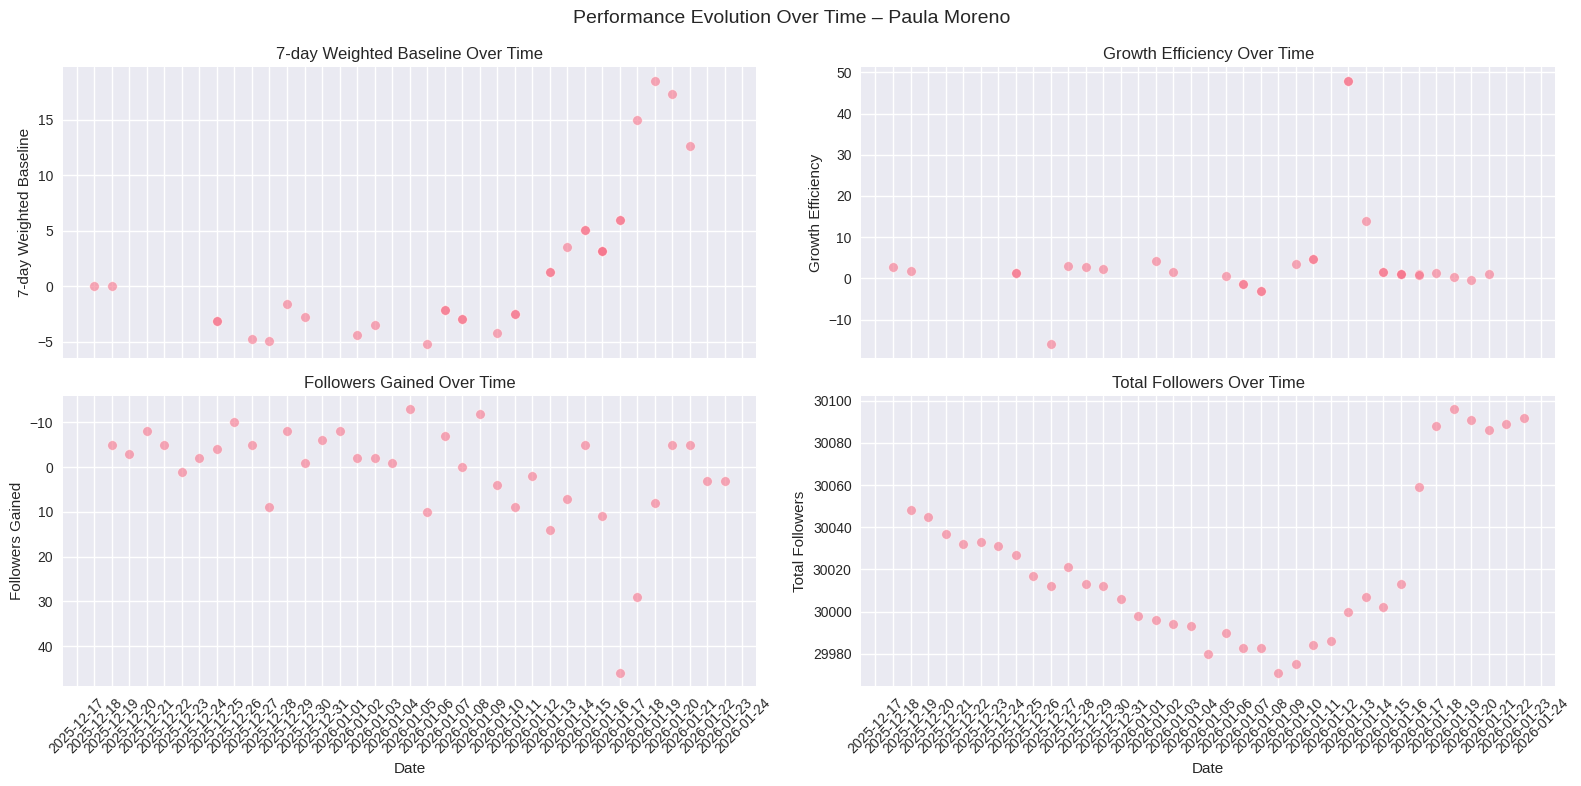

In [126]:
# Gráficos de dispersão da eficiência de crescimento, crescimento comparado a linha de base dos últimos 7 dias, seguidores ganhos e total de seguidores ao longo o tempo
# Scatterplots of growth efficiency, growth compared to the last 7 days baseline, followers gained and total followers across time

df_inf = final_results_with_baselines[
    final_results_with_baselines['Influencer'] == 'paula_moreno'
].copy()

data_paula = data[
    data['Influencer'] == 'paula_moreno'
].copy()

# Ensure datetime
df_inf['Reel_Date'] = pd.to_datetime(df_inf['Reel_Date'], errors='coerce')
data_paula['Date'] = pd.to_datetime(data_paula['Date'], errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)

# --- Plot 1: 7-day weighted baseline ---
sns.scatterplot(
    data=df_inf,
    x='Reel_Date',
    y='7day_weighted_baseline',
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title('7-day Weighted Baseline Over Time')
axes[0, 0].set_ylabel('7-day Weighted Baseline')

# --- Plot 2: Growth efficiency ---
sns.scatterplot(
    data=df_inf,
    x='Reel_Date',
    y='growth_efficiency',
    alpha=0.6,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Growth Efficiency Over Time')
axes[0, 1].set_ylabel('Growth Efficiency')

# --- Plot 3: Followers gained ---
sns.scatterplot(
    data=data_paula,
    x='Date',
    y='Followers_gained',
    alpha=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Followers Gained Over Time')
axes[1, 0].set_ylabel('Followers Gained')

# --- Plot 4: Total followers ---
sns.scatterplot(
    data=data_paula,
    x='Date',
    y='Total_followers',
    alpha=0.6,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Total Followers Over Time')
axes[1, 1].set_ylabel('Total Followers')

# --- Date formatting ---
for ax in axes.flat:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Performance Evolution Over Time – Paula Moreno', fontsize=14)
plt.tight_layout()
plt.show()


📝**Observações:**

*   Apenas 3 reels se adequaram aos critérios utilizados, todos eles de Paula Moreno e pertencentes ao cluster de competição baixa

*   Apesar de Paula Moreno ser uma das que possui menor número de seguidores, a partir do dia 13/01/2026, associado à 3 reels, ela obteve uma quebra do padrão de baixa aquisição de seguidores e um crescimento de seguidores relevante considerando o seu histórico



📝**Observations:**

* Only 3 reels met the criteria used, all of them from Paula Moreno and belonging to the low competition cluster

* Although Paula Moreno has one of the fewest followers, starting on January 13, 2026, associated with 3 reels, she broke the pattern of low follower acquisition and experienced significant follower growth considering her history

### ✅ Considerações e recomendações finais

### ✅ Final considerations and recommendations


**Considerações Finais:**

*   Ter o maior número de seguidores nem sempre indica que o influenciador irá ganhar mais seguidores que os demais

*   Há uma relação positiva mas muito fraca entre comentários e curtidas, ou seja, muitos que comentam não curtem e vice-versa

*   No geral, os influenciadores não conseguiram manter um bom equilibrio entre quebra de padrão ruim dos últimos 7 dias e crescimento contínuo e acelerado a partir da postagem do reel, exceto por Cris Parolin e Djneiffer Santini

*   Influenciadores menos relevantes ainda sim podem fornecer tópicos de extrema relevância e eficiência em aquisição de seguidores

*   Reels que estão no cluster D estão saturados, ou seja, alta competição, e seus tópicos devem ser evitados



**Recomendações**

*   Com base nos resultados obtidos, para otimizar eficiência no ganho de seguidores a longo prazo e quebrar padrões de estagnação no ganho de seguidores gastando o menor tempo e esforço possível, recomenda-se analisar o conteúdo abordado nos reels selecionados e inspirar-se em seus tópicos para criação de novos reels

*   Também, recomenda-se testar os tópicos dos 3 reels selecionados de Paula Moreno, pois podem favorecer alto crescimento com baixa competiçao


**Final Considerations:**

* Having the most followers doesn't always mean the influencer will gain more followers than others

* There's a positive but very weak correlation between comments and likes; many who comment don't like, and vice versa

* Overall, influencers failed to maintain a good balance between breaking the bad pattern of the last 7 days and continuous, accelerated growth after posting the reel, except for Cris Parolin and Djneiffer Santini

* Even less relevant influencers can still provide extremely relevant and effective topics for gaining followers

* Reels in cluster D are saturated, meaning there is high competition, and their topics should be avoided

**Recommendations**

* Based on the results obtained, to optimize efficiency in gaining followers in the long term and break stagnation patterns in follower growth while spending the least amount of time and effort possible, it is recommended to analyze the content covered in the selected reels and draw inspiration from their topics to create new reels


* It is also recommended to test the topics from the 3 selected reels by Paula Moreno, as they may favor high growth with low competition

